In [199]:
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib


import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
#scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import xlrd
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection #might be model_selection <--- this is the new one
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
import xgboost as xgb


sns.set_style("whitegrid")
%matplotlib inline

scipy: 0.19.1
numpy: 1.12.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0


In [200]:
data = pd.read_excel('ATTENDEEISSA2017NumericalExcelCleaned.xlsx', header = 0)
#data_antendees = pd.read_excel('HW3Data.xlsx', sheetname = 'trainY')

In [201]:
#data_a, data_b = train_test_split(data, test_size=0.2, random_state = 7)

In [202]:
data.shape

(760, 165)

In [203]:
data_a = data.apply(pd.to_numeric, errors='ignore')    #changes dataframe dtypes to their lowest

In [204]:
#cols = list(data_a)    # THIS DROPS ALL COLUMNS THAT HAVE THE SAME VALUE AND IGNORES NANS SO BE CAREFUL
#nunique = data_a.apply(pd.Series.nunique)
#cols_to_drop = nunique[nunique == 1].index
#cols_to_drop
#data_a = data_a.drop(cols_to_drop, axis=1)

In [205]:
data_a = data.drop('Collector ID', axis = 1)

In [206]:
data_a.shape

(760, 164)

In [207]:
#data_a = data_a.loc[: , ~data_a.columns.duplicated()]#i think this is only column name

In [208]:
data_a = data_a.T.drop_duplicates().T

In [209]:
data_a.shape

(760, 156)

In [210]:
data_a = data_a.dropna(axis=1, how='all')

In [211]:
data_a = data_a.dropna(axis=0, how='all')

In [212]:
data_a.shape

(759, 155)

In [213]:
data_a = data_a.apply(pd.to_numeric, errors='ignore') 

In [214]:
corr = data_a.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()


In [215]:
testcorr = corr.dropna(axis=1, how='all')

In [216]:
testcorr = testcorr.dropna(axis=0, how='all')

In [217]:
plt.figure(figsize=(150, 150))
sns.heatmap(testcorr,vmin=-1, vmax=1, square=True)

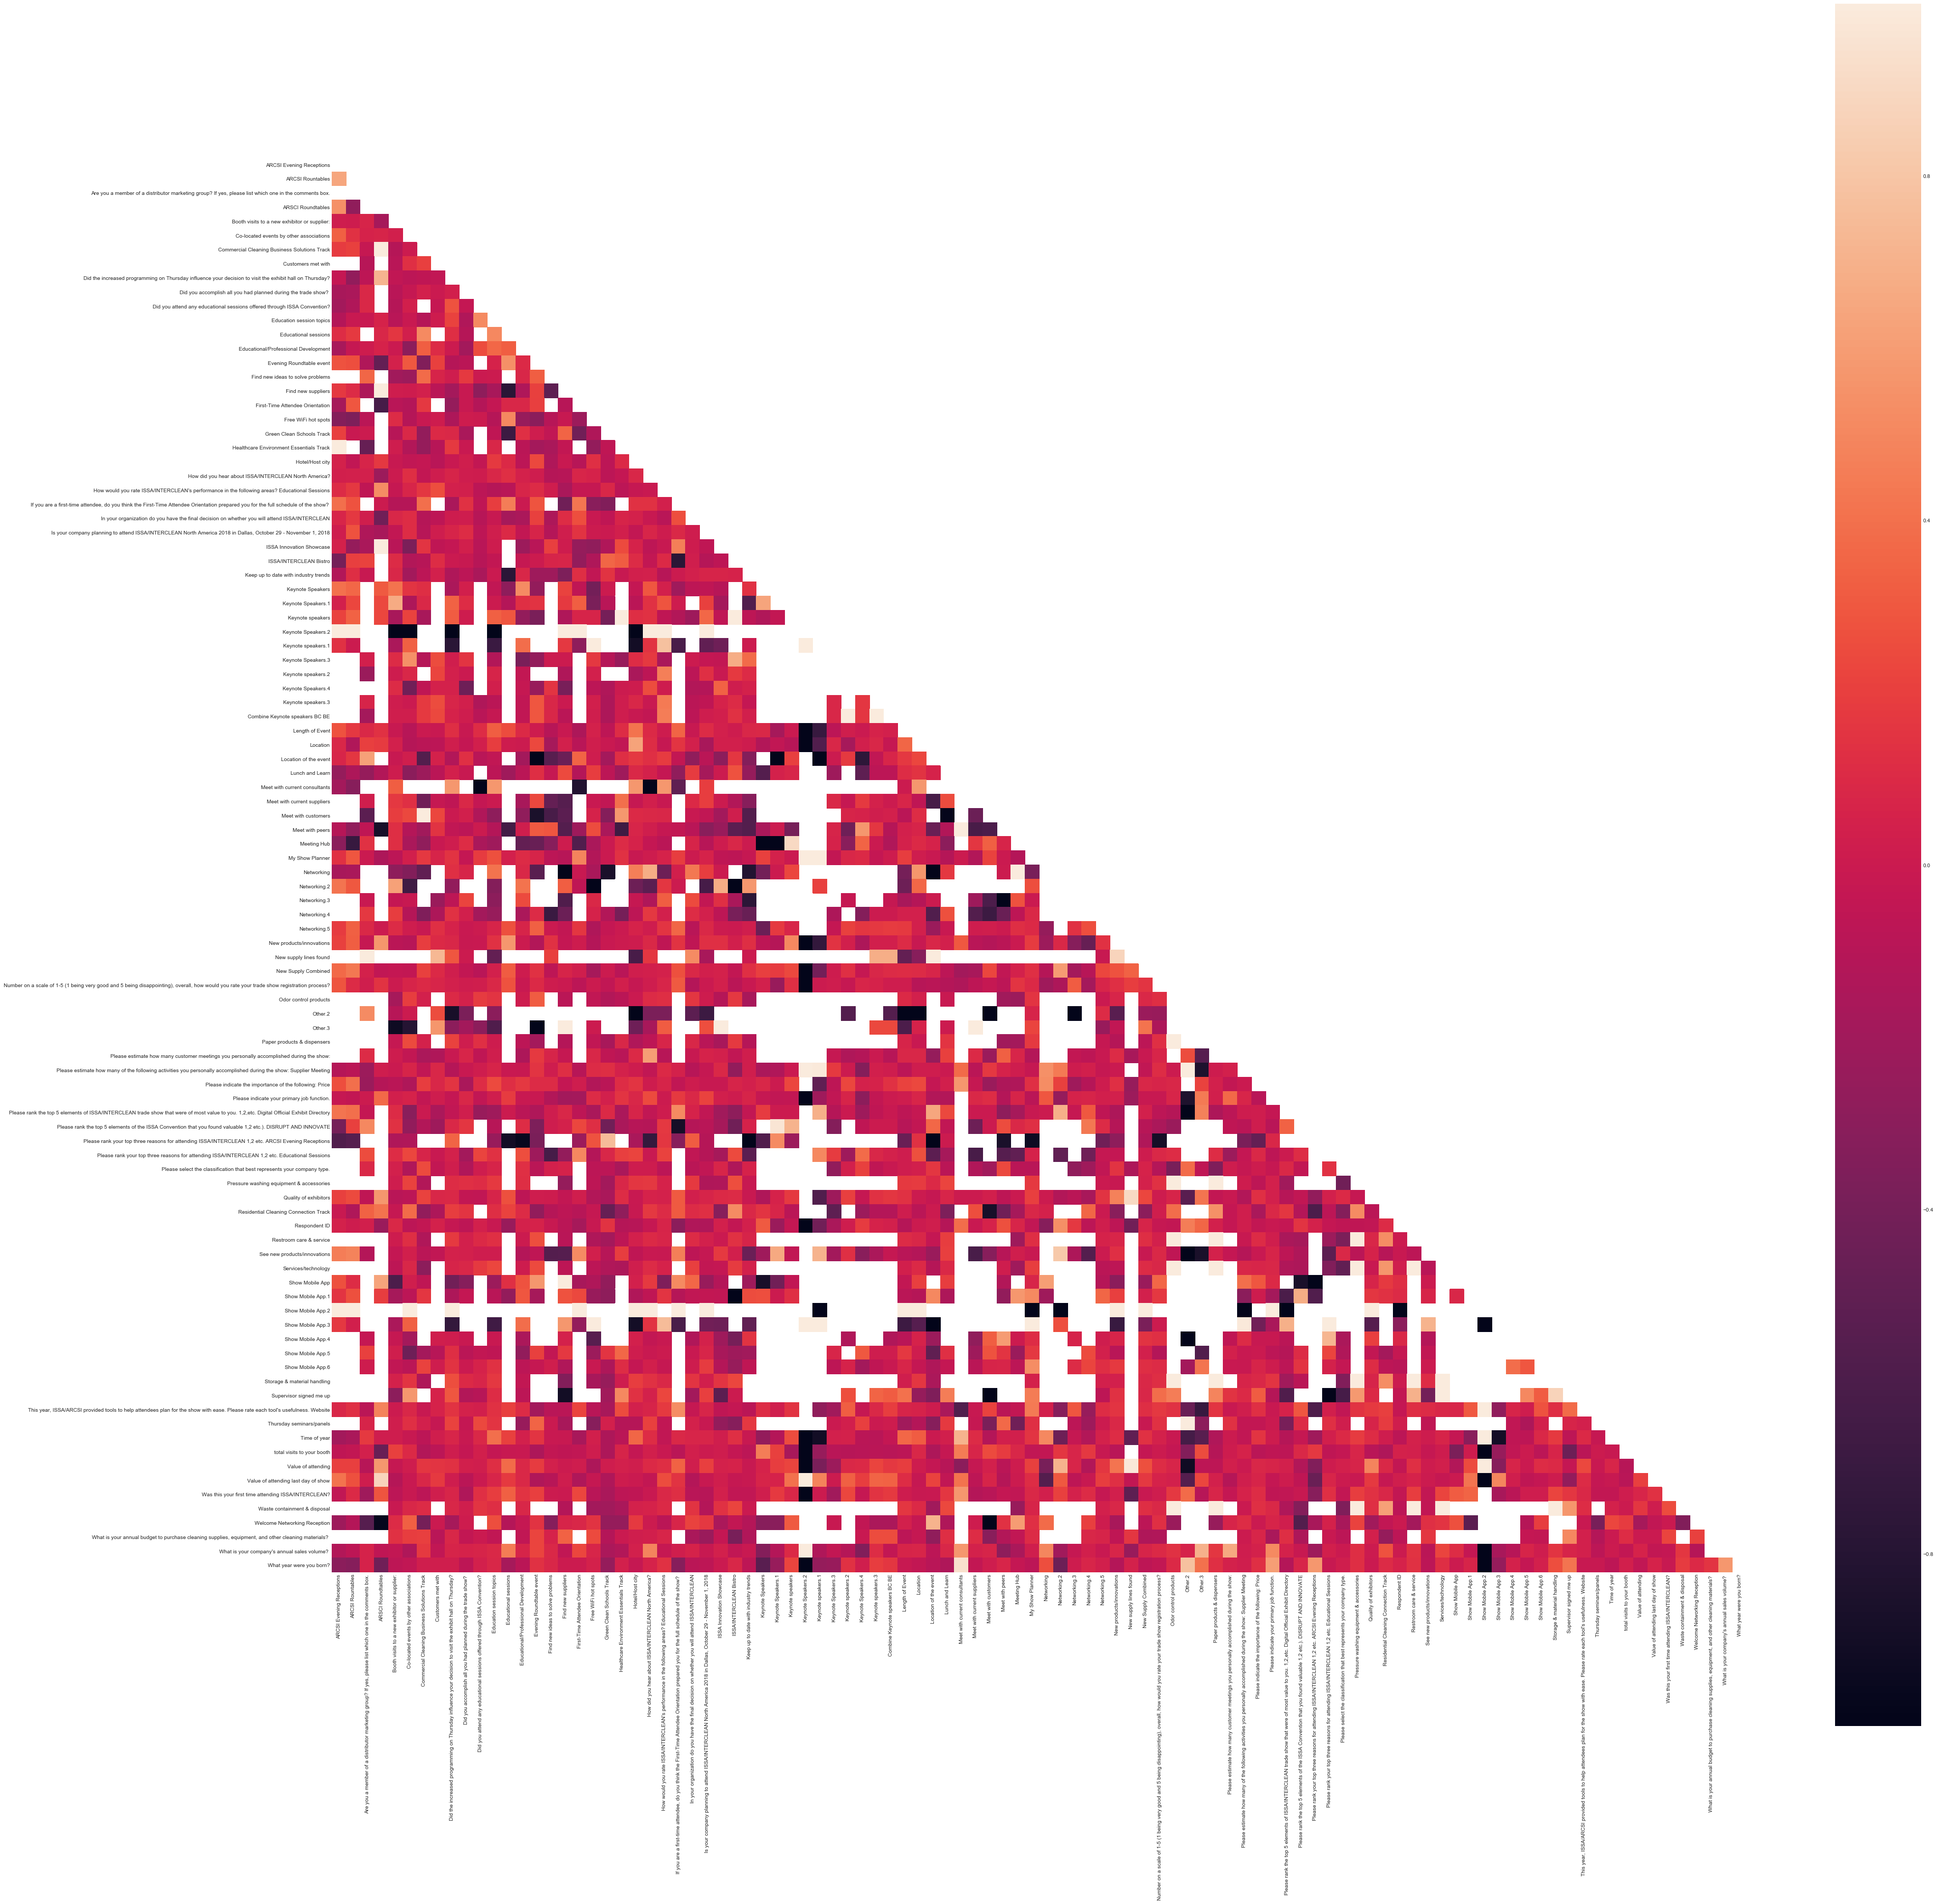

In [218]:
mask = np.zeros_like(testcorr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(testcorr, mask=mask, vmin = -1, vmax=1, square=True)

In [219]:
sum_happy = []
for a in range(0,len(data_a.iloc[:,41])):
    if data_a.iloc[a,41] == 5 or data_a.iloc[a,41]==4:
        sum_happy.append(3)
    elif data_a.iloc[a,41] == 3:
        sum_happy.append(2)
    elif data_a.iloc[a,41] ==2 or data_a.iloc[a,41]==1:
        sum_happy.append(1)

        

In [220]:
data_a = data_a[np.isfinite(data_a['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'])] #drop rows that dont have company planning to attend

In [221]:
data_a['sum_happy'] = sum_happy

In [222]:
data_a.shape

(513, 156)

In [223]:
data_a[data_a['How did you hear about ISSA/INTERCLEAN North America?'] > 15].index

Int64Index([234], dtype='int64')

In [224]:
data_a = data_a.drop(234, axis = 0)

In [225]:
data_a[data_a['First-Time Attendee Orientation'] > 15].index

Int64Index([458, 725], dtype='int64')

In [226]:
data_a = data_a.drop([458, 725], axis = 0)

In [227]:
data_Y = data_a['sum_happy']

In [228]:
data_X = data_a

In [229]:
data_X = data_X.drop(['IP Address','Respondent ID'], axis = 1)

In [230]:
data_X = data_X.drop(['Is your company planning to attend ISSA/INTERCLEAN North America 2018 in Dallas, October 29 - November 1, 2018'],axis = 1)

In [231]:
data_X = data_X.drop(['sum_happy'],axis=1)

In [232]:
data_X.shape

(510, 152)

In [233]:
data_X = data_X.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:]

In [234]:
data_X = data_X.astype(float)

In [235]:
data_Y = data_Y.astype(float)

In [236]:
data_X.to_pickle("data_X.pickle")

In [237]:
data_Y.to_pickle("data_Y.pickle")

In [362]:
data_X = pd.read_pickle("data_X.pickle")

In [363]:
data_Y = pd.read_pickle("data_Y.pickle")

In [364]:
data_X_hold_X = data_X[data_X.columns[data_X.max() > 15]]
data_X_hold_columns = data_X.columns[data_X.max() > 15]

In [365]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(data_X_hold_X)
data_T=imp.transform(data_X_hold_X)

In [366]:
data_X.loc[0:510,data_X_hold_columns] = pd.DataFrame(data_T, columns = data_X_hold_columns)

In [367]:
data_X['Commercial Cleaning Business Solutions Track'].isnull().index[1]

2

In [368]:
data_X.columns[data_X.max() > 15]


Index([u'Booth visits to a new exhibitor or supplier:',
       u'Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting',
       u'total visits to your booth', u'What year were you born?'],
      dtype='object')

In [369]:
for a in data_X.columns[data_X.max() > 15]:
    for idx, val in enumerate(data_X[a].isnull()):
        print idx, val

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [370]:
 
for a in data_X.columns[data_X.max() > 15]:
    for idx, val in enumerate(data_X[a].isnull()):
        if val:
            data_X[a][data_X[a].isnull().index[idx]] = data_X[a].mean()
        
      
            
   

In [371]:
data_X = pd.get_dummies(data_X, dummy_na = True, columns = data_X.columns[data_X.max() < 15])

In [245]:
from sklearn.metrics import confusion_matrix

In [246]:
import pandas_ml as pdml
import imblearn

In [372]:
data_normalized = pd.concat([data_X, data_Y], axis = 1)
data_normalized = pdml.ModelFrame(data_normalized, target = 'sum_happy')


In [373]:
sampler = data_normalized.imbalance.over_sampling.SMOTE()


In [374]:
sampler

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)

In [375]:
sampled = data_normalized.fit_sample(sampler)

In [376]:
sampled=pd.DataFrame(sampled)

In [377]:
sampled = sampled.sample(frac=1)

In [378]:
data_Y = sampled['sum_happy']

In [379]:
data_X = sampled.drop(['sum_happy'], axis = 1)

In [380]:
data_X.shape

(1041, 503)

In [56]:
y_test = pd.get_dummies(data_Y)

In [57]:
Z=[]
Z=pd.concat([data_X,y_test],axis=1)

In [58]:
pd.options.display.max_columns =  100

In [329]:
data_X = data_X.iloc[:,top_130_important_features]


In [385]:
X = data_X


In [381]:
y = data_Y

In [61]:
scaler = Normalizer().fit(X)   # always want to save the value you returned
normalizedX = scaler.transform(X)
X = normalizedX


In [62]:
#data_X = data_X.fillna(-1)

In [63]:
#scikit-learn indeed strips the column headers in most cases, so just add them back on afterward. 
#In your example, with X_imputed as the sklearn.preprocessing output and X_train as the original dataframe, 
#you can put the column headers back on with:

#X_imputed_df = pd.DataFrame(X_imputed, columns = X_train.columns)

In [353]:

num_folds = 10
num_instances = len(data_X) 
seed = 7
scoring = None



In [382]:
Columns = X.columns

In [384]:
Columns

Index([u'Booth visits to a new exhibitor or supplier:',
       u'Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting',
       u'total visits to your booth', u'What year were you born?',
       u'ARCSI Evening Receptions_0.0', u'ARCSI Rountables_4.0',
       u'Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0',
       u'Co-located events by other associations_3.0',
       u'Co-located events by other associations_5.0',
       u'Commercial Cleaning Business Solutions Track_1.0',
       ...
       u'Value of attending_3.0', u'Value of attending last day of show_0.0',
       u'Was this your first time attending ISSA/INTERCLEAN?_1.0',
       u'Waste containment & disposal_nan',
       u'Welcome Networking Reception_nan',
       u'What is your annual budget to purchase cleaning supplies, equipment, and other cleaning materials? _3.0',
       u'What is your company's annual s

In [386]:
X = X[Columns]

In [387]:
X.shape

(1041, 130)

In [359]:
daX.shape

(510, 130)

In [360]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, daX, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.666667 (0.053339)
NB: 0.507843 (0.093811)
KNeighborsClassifier: 0.660784 (0.061414)
XGBClassifier: 0.674510 (0.057635)
GradientBoostingClassifier: 0.674510 (0.047384)
AdaBoostClassifier: 0.633333 (0.081814)
RandomForestClassifier: 0.686275 (0.058166)
ExtraTreesClassifier: 0.684314 (0.061663)
DecisionTreeClassifier: 0.541176 (0.042237)


In [262]:
estimator = xgb.XGBClassifier()
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 167
Feature Ranking: [  1   1   1   1   1  83  82  81  92  97  91 100  85  93   1 103   1 107
   1  80 111  84 121   1 118  31 129   1 109   1   1   1 127 113  19 123
  28 117   1   1 101  55  86   1   1 158   1 153 131  46 163  90   1  42
 115   1   1  95   1 140 188 190 146 144   1   1   1  35  45 108 160 162
 210  96 170  14  26 168 227  38 178   1  52 185  10  79 137  39 201 204
 202 192   8 195  32 165 148   1  72 228   1   1   1   1 203 124 205 285
   1   1   1 222   1  76   1   1  12 265 264 268  16   1 181 272  25  48
   1 287 288  29  33 294 296   1  67   1 223 229 231 309 310   1   9 237
 239   1   1  98 125   1   1   1   1   1 211   1   1   1   1   1 281 289
 291 297 299  24 303 305 311 313 315 317 319 321 323 325 327   1 331 332
 335 336 334 330 308 120 154 196 198 199 166 167   1 175  11   1 273  51
 246  71 142  43   1   1 116   1   1 179  69   1   1   1   1 169  13   1
   1  57 134 136   1   1   1 200 194 130   1 186   1   1  65 250 206 212
   1 216 218 2

In [263]:
new_features = [] 
for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == 1:
            new_features.append(b)
            print b, data_X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
4 ARCSI Evening Receptions_0.0
14 ARCSI Rountables_4.0
16 Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0
18 Are you a member of a distributor marketing group? If yes, please list which one in the comments box._nan
23 Cleaning tools & supplies_2.0
27 Co-located events by other associations_3.0
29 Co-located events by other associations_5.0
30 Co-located events by other associations_nan
31 Commercial Cleaning Business Solutions Track_1.0
38 Customers met with_1.0
39 Customers met with_2.0
43 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
44 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
46 Di

In [361]:
y.shape

(510L,)

In [264]:
new_X = data_X.iloc[:,new_features]

In [269]:
X = new_X

In [266]:
X.shape

(1041, 167)

In [215]:
y_test = pd.get_dummies(y)

In [216]:
Z=[]
Z=pd.concat([X,y_test],axis=1)

In [219]:
corr = Z.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

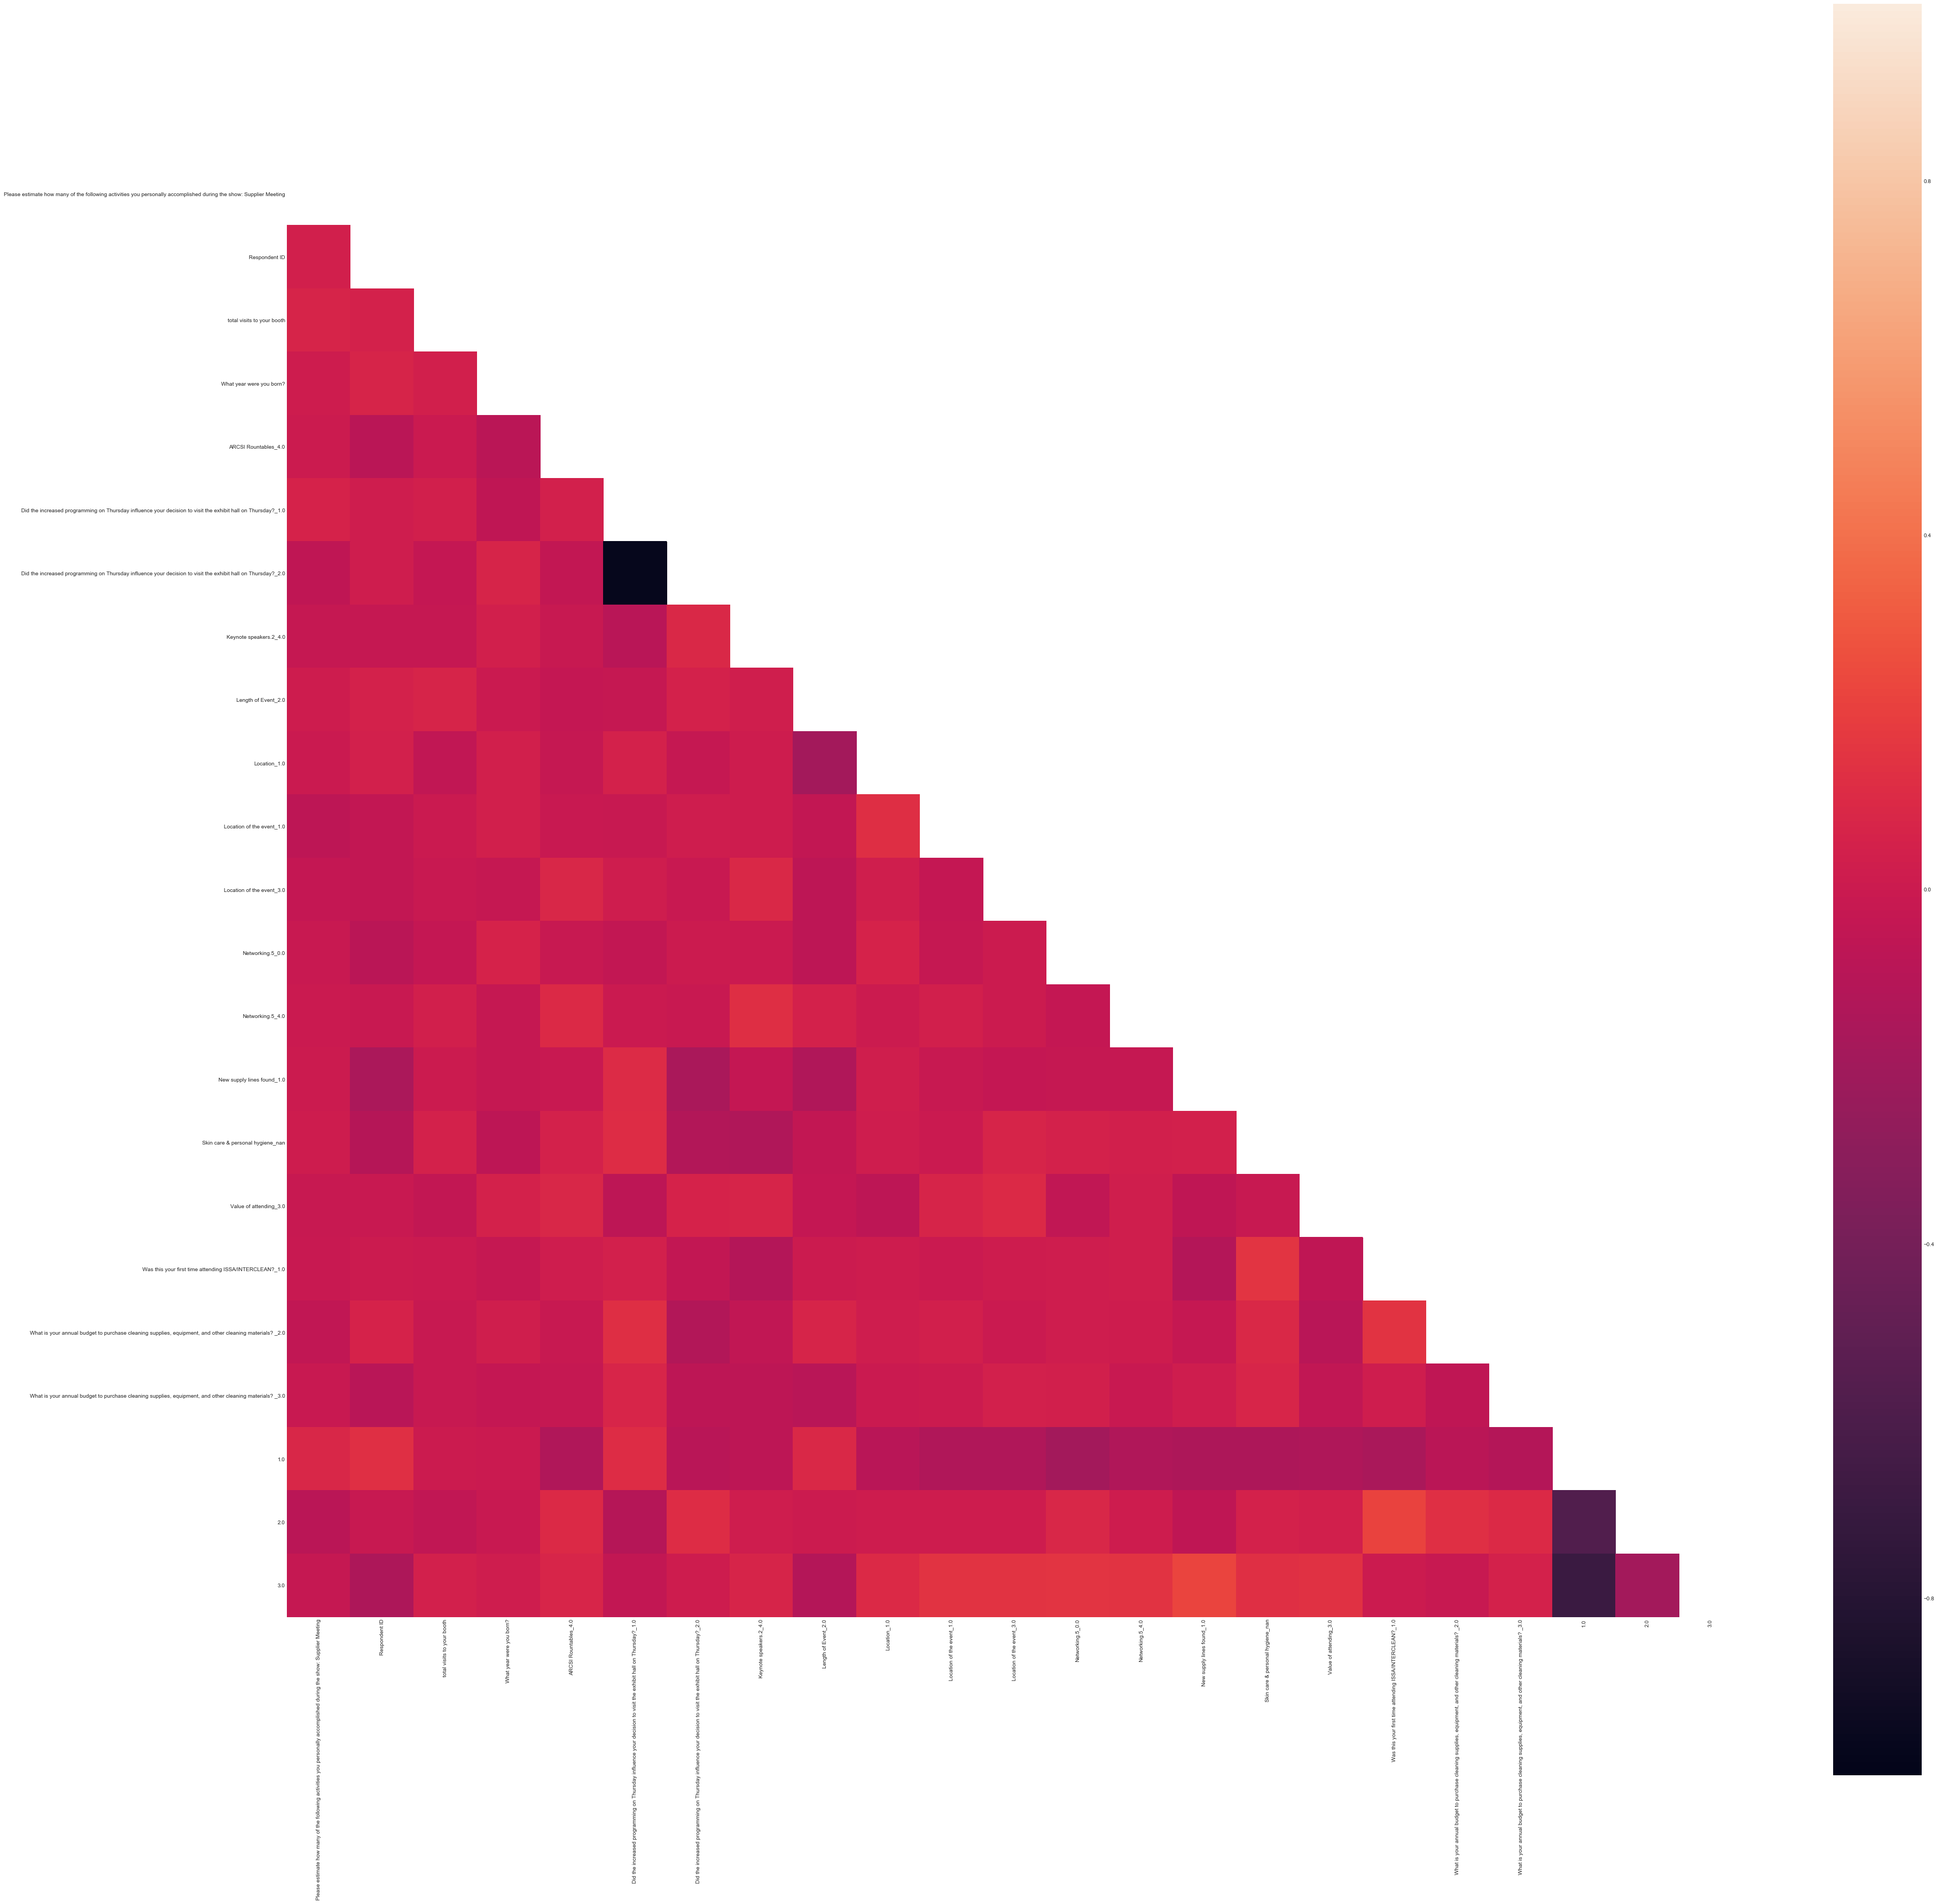

In [220]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [268]:
first_new_f = X

In [267]:
X = first_new_f

In [270]:
models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.848260 (0.036492)
NB: 0.736786 (0.034221)
KNeighborsClassifier: 0.705027 (0.056167)
XGBClassifier: 0.874139 (0.024580)
GradientBoostingClassifier: 0.880888 (0.021124)
AdaBoostClassifier: 0.783810 (0.047331)
RandomForestClassifier: 0.852079 (0.040328)
ExtraTreesClassifier: 0.895302 (0.025195)
DecisionTreeClassifier: 0.741566 (0.046936)


In [271]:
estimator = xgb.XGBClassifier()
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 130
Feature Ranking: [ 1  1  1  1  1  1  1 13 22  1  1 20  1 14  1  1  1  1  1  1 38 36 16  1  1
 32  1 19  1  1  1 29  1 21  1  1  1  1  1  1  1  1  1  1  1 25 34 24  1  1
  1  1  1  1  1  1  9 27 15  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 30  1 28  1  1 10  5  1 18  1  1  1  1  1  1  1  1  1  1  1 23
 37  1  1  1  7  1 33  1  1  6 26  1  1  1  8  1  1  1  1 12  1  1  1  1  1
  1 35  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1 11  1  1  1 31  1  1  1
  1  1  1  1  1  1  4 17  2  1  1  1  1  1  1  1  1]


In [272]:
top_130_important_features = [] 
for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == 1:
            top_130_important_features.append(b)
            print b,X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
4 ARCSI Evening Receptions_0.0
5 ARCSI Rountables_4.0
6 Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0
9 Co-located events by other associations_3.0
10 Co-located events by other associations_5.0
12 Commercial Cleaning Business Solutions Track_1.0
14 Customers met with_2.0
15 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
16 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
17 Did you accomplish all you had planned during the trade show? _1.0
18 Education session topics_1.0
19 Education session topics_4.0
23 Educational/Professional Development_4.0
24 Educational/Professional Development_5.0
2

In [273]:
new_X = X.iloc[:,top_130_important_features]


In [274]:
X = new_X

In [334]:
X.columns

Index([u'Booth visits to a new exhibitor or supplier:',
       u'Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting',
       u'total visits to your booth', u'What year were you born?',
       u'ARCSI Evening Receptions_0.0', u'ARCSI Rountables_4.0',
       u'Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0',
       u'Co-located events by other associations_3.0',
       u'Co-located events by other associations_5.0',
       u'Commercial Cleaning Business Solutions Track_1.0',
       ...
       u'Value of attending_3.0', u'Value of attending last day of show_0.0',
       u'Was this your first time attending ISSA/INTERCLEAN?_1.0',
       u'Waste containment & disposal_nan',
       u'Welcome Networking Reception_nan',
       u'What is your annual budget to purchase cleaning supplies, equipment, and other cleaning materials? _3.0',
       u'What is your company's annual s

In [275]:
top_130_important_features_X = X

In [388]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840577 (0.032561)
NB: 0.749267 (0.028762)
KNeighborsClassifier: 0.685897 (0.028953)
XGBClassifier: 0.879954 (0.029395)
GradientBoostingClassifier: 0.881886 (0.029574)
AdaBoostClassifier: 0.773342 (0.040050)
RandomForestClassifier: 0.824203 (0.040365)
ExtraTreesClassifier: 0.895302 (0.023682)
DecisionTreeClassifier: 0.741621 (0.037636)


In [389]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 129
Feature Ranking: [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [317]:
X.shape

(1041, 130)

In [313]:
for a in X.columns:
    print a

Booth visits to a new exhibitor or supplier:
Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
total visits to your booth
What year were you born?
ARCSI Evening Receptions_0.0
ARCSI Rountables_4.0
Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0
Co-located events by other associations_3.0
Co-located events by other associations_5.0
Commercial Cleaning Business Solutions Track_1.0
Customers met with_2.0
Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
Did you accomplish all you had planned during the trade show? _1.0
Education session topics_1.0
Education session topics_4.0
Educational/Professional Development_4.0
Educational/Professional Development_5.0
Free WiFi hot spots_2.0
Free WiFi hot spots_nan

In [300]:
mode =  LogisticRegression(random_state = seed)
results = mode.fit(X,y)
array = mode.predict(X)
probab = mode.predict_proba(X)

In [310]:
results.coef_[3]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [304]:
for a in results.coef_:
    print X.
    print a

[  2.30397488e-03   4.72833424e-02  -1.89359339e-04   2.28700069e-03
  -4.96329197e-01  -1.49448613e+00  -2.66464218e-01   1.44996591e-01
   1.12510763e-01  -3.60967672e-01  -4.87916375e-01   6.03678085e-01
  -8.23119732e-01   4.65801372e-01   2.29490345e-01  -5.25196739e-01
  -6.17849807e-01   5.21488998e-01   1.40918925e+00   1.23213427e-01
  -1.26418913e+00   1.72958211e+00   7.29664094e-01  -1.63519861e+00
  -9.96213763e-02  -1.42186899e-02  -2.57878186e-02   9.45049099e-01
   4.16683920e-01  -5.91299018e-01  -5.49647302e-01   6.14946624e-01
  -2.85482205e-01  -2.44294789e-01   5.58236649e-01   2.99945970e-01
   5.23445719e-01  -3.32677305e-01   1.62630907e-01  -4.25044279e-01
   2.15257917e-01  -1.05890623e-01  -3.07283532e-01   4.06616780e-01
  -4.97681812e-01  -1.43015088e-01   7.03005372e-01  -3.16202936e-01
   2.49604115e-01   4.27283544e-01  -8.59249702e-01   6.51293248e-01
  -1.60457772e-01  -1.26695000e+00  -5.21469835e-01   4.41388781e-01
   1.75315827e+00  -2.40901553e-01

In [294]:
confusion_matrix(y, array)

array([[284,  32,  31],
       [ 14, 330,   3],
       [ 15,   2, 330]], dtype=int64)

In [285]:
for a in probab:
    print probab

[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.118

[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.118

[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.11863931]
 [ 0.04312452  0.01969535  0.93718013]
 [ 0.96094037  0.00269753  0.0363621 ]
 ..., 
 [ 0.11149715  0.88029483  0.00820802]
 [ 0.22984534  0.00455077  0.76560388]
 [ 0.04622089  0.94763417  0.00614494]]
[[ 0.01774791  0.86361278  0.118

In [277]:
y_dummy = pd.get_dummies(y)

In [271]:
Z.dtypes

NameError: name 'Z' is not defined

In [278]:
Z=[]
Z=pd.concat([X,y_dummy],axis=1)

In [279]:
corr = Z.select_dtypes(include = ['uint8', 'int64', 'float64']).iloc[:, 1:].corr()

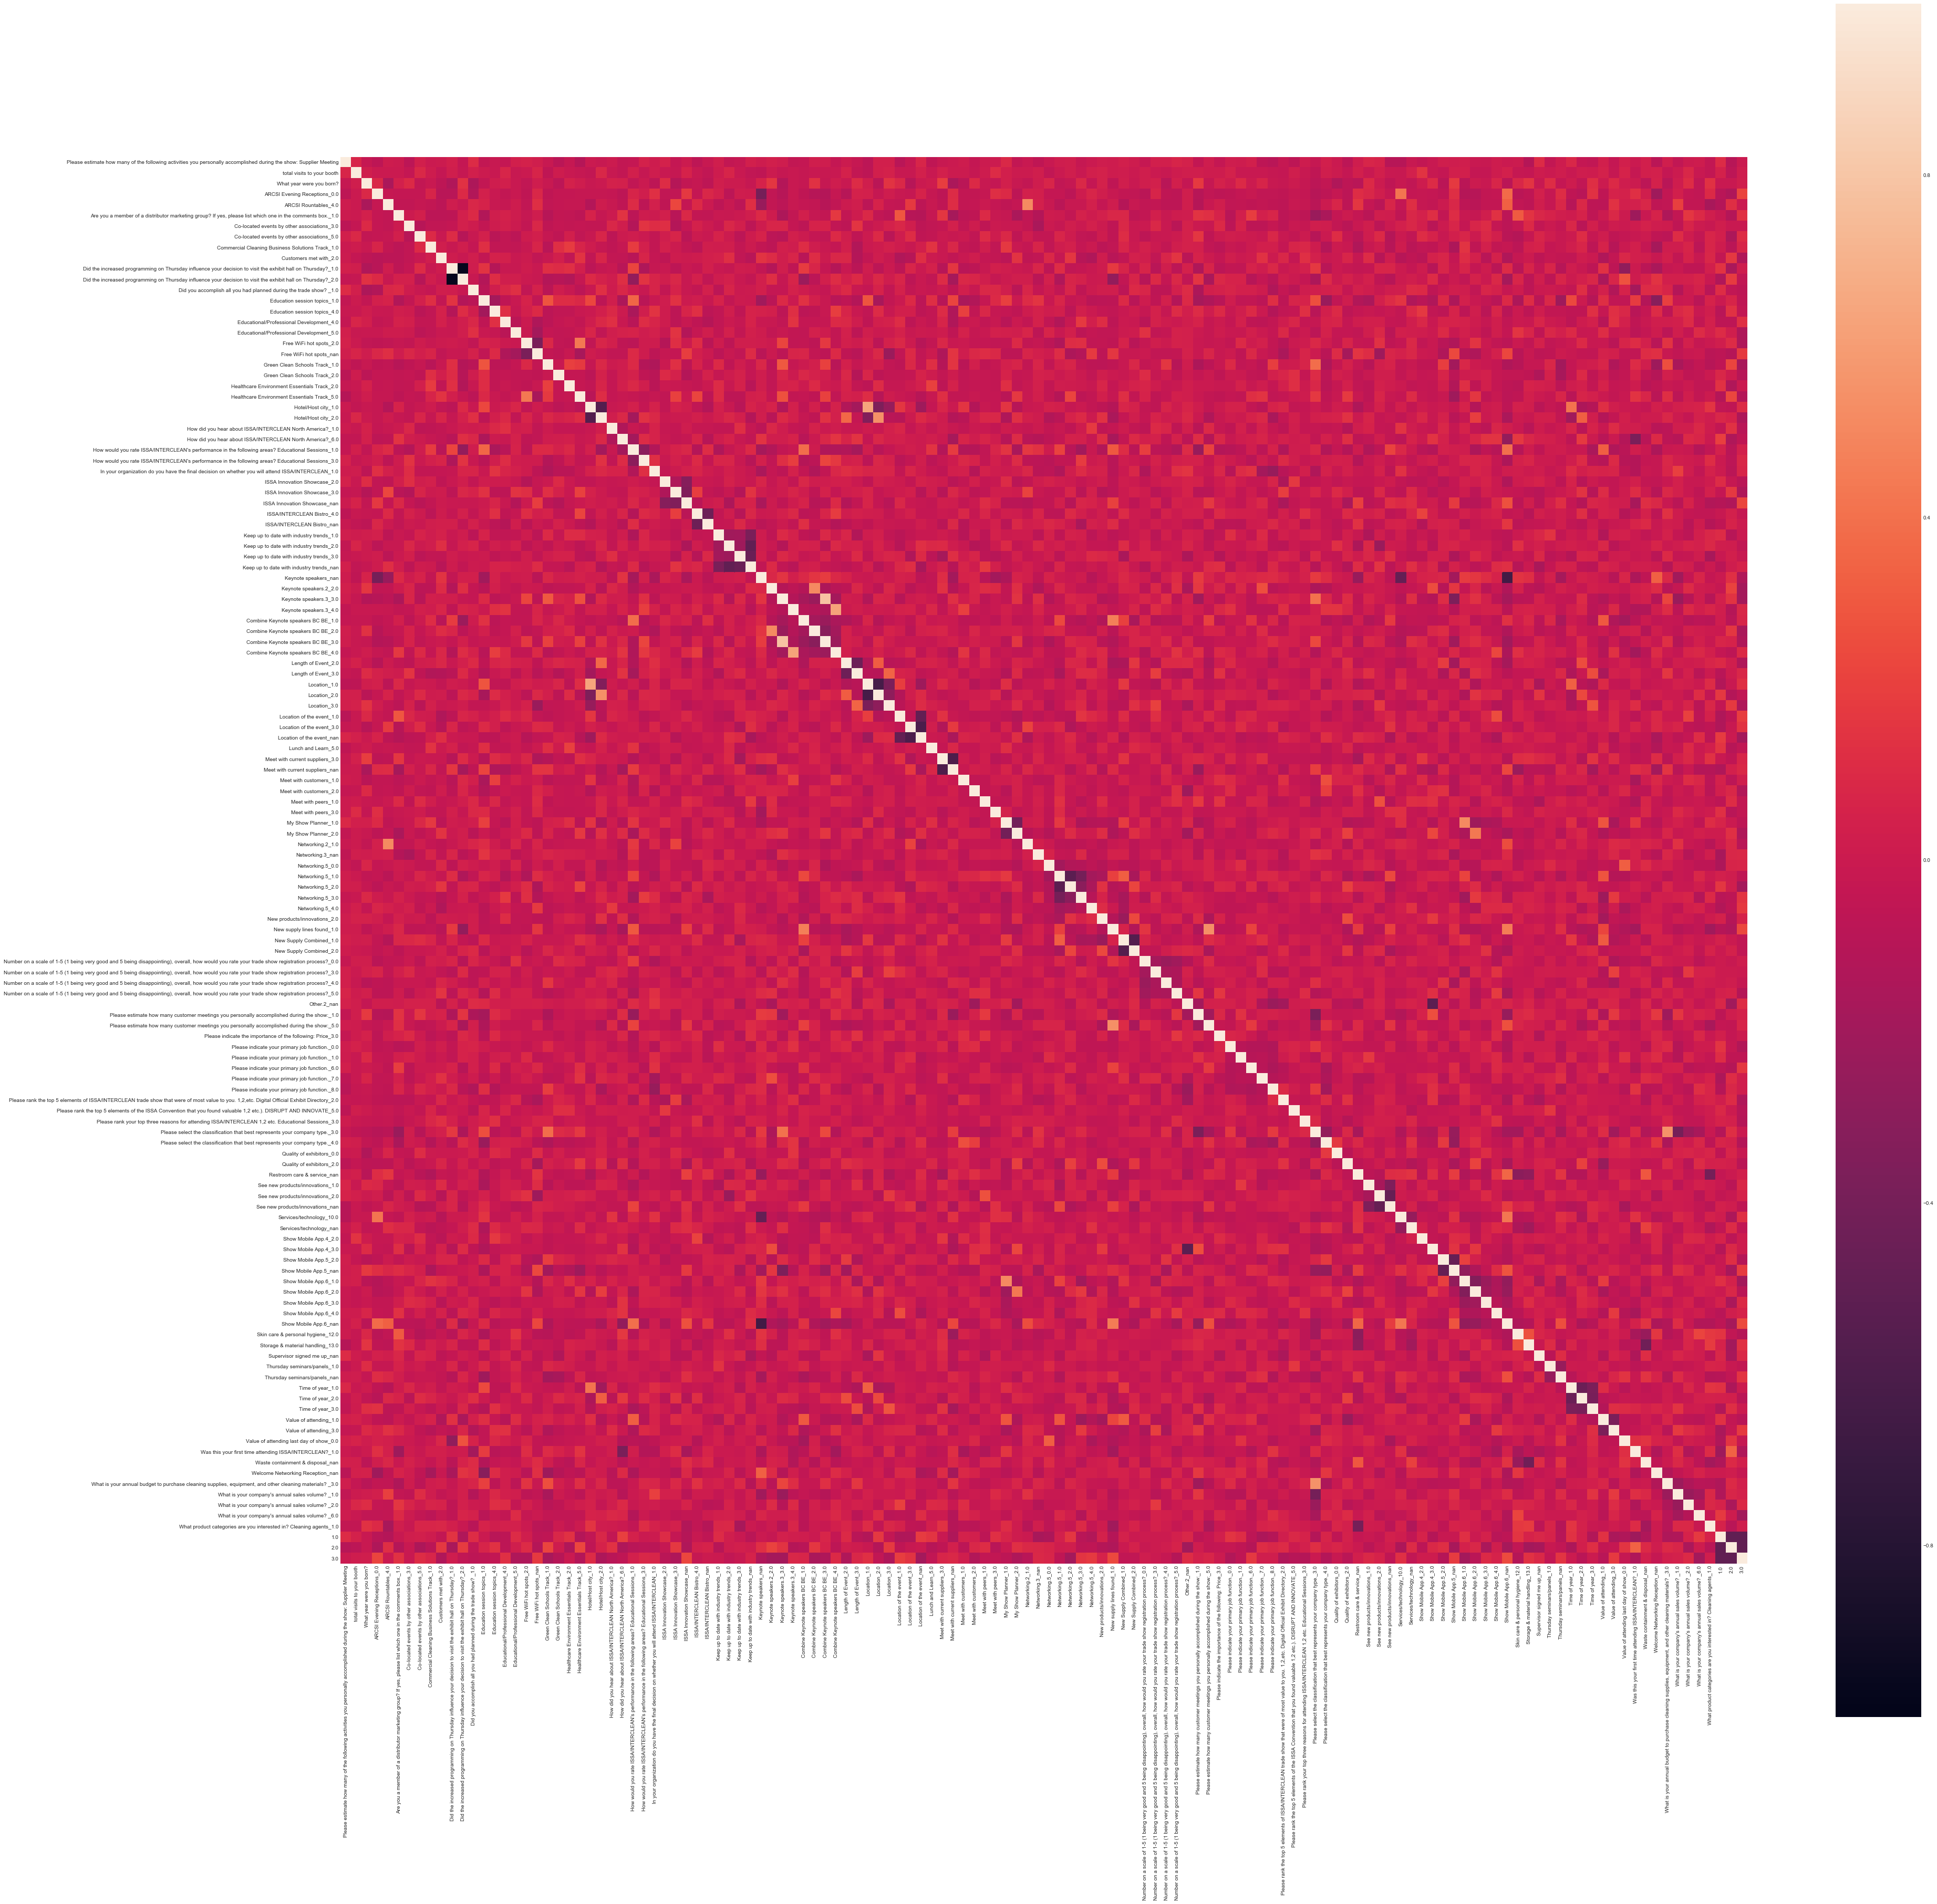

In [280]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr,  vmin = -1, vmax=1, square=True)

In [88]:
ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 163
Feature Ranking: [ 1  1  1  1  1 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 15
  1  1  6  1  1  2  1  1  1  1  1  1  1  1  1  1  1 12  1  1  1  1  1  1  1
  1  1  1  1  1  1 16  1  1  1  1  1  1  1  1 13  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 17  1  1  1  1  7  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  1  1  1  8  1  1
  1  9  1  1  1  1  1  5  1  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 14  1  1  1  1  1  1  1  1  3  1  1
  1  1  1  1]


In [390]:
top_129_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_129_important_features.append(b)
        print b, X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
3 What year were you born?
4 ARCSI Evening Receptions_0.0
5 ARCSI Rountables_4.0
6 Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0
7 Co-located events by other associations_3.0
8 Co-located events by other associations_5.0
9 Commercial Cleaning Business Solutions Track_1.0
10 Customers met with_2.0
11 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
12 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
13 Did you accomplish all you had planned during the trade show? _1.0
14 Education session topics_1.0
15 Education session topics_4.0
16 Educational/Professional Development_4.0
17 Educational/Professional Development_5.0
18 Free WiFi hot spots_2.0
19 Fr

In [391]:
new_X = X.iloc[:,top_129_important_features]
X = new_X

In [91]:
top_163_important_features_X

NameError: name 'top_163_important_features_X' is not defined

In [392]:
top_129_important_features_X = X

In [402]:
X = top_129_important_features_X

In [393]:
models=[]
models.append(('LR', LogisticRegression( random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.841548 (0.036770)
NB: 0.710852 (0.031162)
CART: 0.727225 (0.046869)
KNeighborsClassifier: 0.667656 (0.031314)
XGBClassifier: 0.880916 (0.024949)
GradientBoostingClassifier: 0.878049 (0.032224)
AdaBoostClassifier: 0.761777 (0.040915)
RandomForestClassifier: 0.838690 (0.037456)
ExtraTreesClassifier: 0.904945 (0.032388)
DecisionTreeClassifier: 0.727225 (0.046869)


In [403]:
model = LogisticRegression( random_state = seed)
results = model.fit(X,y)
#test_preds = model.predict(test_X)
array = model.predict(X)
probab = model.predict_proba(X)

In [439]:
for a, val in enumerate(np.argsort(results.coef_[0])):
    if val < 9:
        print results.coef_[0][a]
        print val

0.00182737760512
4
0.602580724324
8
0.570524214247
3
0.785418981611
5
-0.230414219261
0
1.12189667926
2
0.498119422005
7
-2.97105976915
1
0.931003691296
6


In [469]:
results.coef_

array([[-2.971, -1.815, -1.635, -1.622, -1.546, -1.529, -1.527, -1.269,
        -1.152, -1.140, -1.122, -1.096, -1.033, -1.031, -0.965, -0.963,
        -0.959, -0.930, -0.928, -0.863, -0.851, -0.835, -0.825, -0.819,
        -0.772, -0.684, -0.656, -0.652, -0.634, -0.631, -0.613, -0.569,
        -0.541, -0.531, -0.513, -0.486, -0.463, -0.460, -0.426, -0.397,
        -0.389, -0.386, -0.377, -0.376, -0.365, -0.362, -0.342, -0.330,
        -0.324, -0.317, -0.291, -0.282, -0.278, -0.276, -0.270, -0.230,
        -0.207, -0.200, -0.190, -0.101, -0.087, -0.085, -0.076, -0.053,
        -0.051, -0.038, -0.028, 0.001, 0.002, 0.012, 0.034, 0.037, 0.042,
        0.080, 0.089, 0.096, 0.117, 0.122, 0.167, 0.194, 0.209, 0.213,
        0.220, 0.223, 0.228, 0.229, 0.236, 0.247, 0.260, 0.263, 0.278,
        0.312, 0.379, 0.394, 0.409, 0.410, 0.411, 0.414, 0.422, 0.462,
        0.481, 0.498, 0.537, 0.556, 0.571, 0.589, 0.591, 0.603, 0.613,
        0.618, 0.695, 0.728, 0.738, 0.775, 0.785, 0.858, 0.893, 0.

In [436]:
results.coef_[0][94]

0.27755008726248015

In [474]:
np.argsort(abs(results.coef_[0]))

array([ 67,  68,  69,  66,  70,  71,  65,  72,  64,  63,  62,  73,  61,
        60,  74,  75,  59,  76,  77,  78,  58,  79,  57,  56,  80,  81,
        82,  83,  84,  85,  55,  86,  87,  88,  89,  54,  53,  90,  52,
        51,  50,  91,  49,  48,  47,  46,  45,  44,  43,  42,  92,  41,
        40,  93,  39,  94,  95,  96,  97,  98,  38,  37,  99,  36, 100,
        35, 101,  34,  33, 102,  32, 103,  31, 104, 105, 106, 107,  30,
       108, 109,  29,  28,  27,  26,  25, 110, 111, 112,  24, 113, 114,
        23,  22,  21,  20, 115,  19, 116,  18,  17, 117,  16,  15,  14,
       118, 119,  13,  12, 120, 121,  11, 122, 123,  10, 124,   9,   8,
         7, 125,   6,   5,   4, 126,   3,   2, 127,   1, 128,   0], dtype=int64)

In [471]:
np.sort(abs(results.coef_[0]))

array([0.001, 0.002, 0.012, 0.028, 0.034, 0.037, 0.038, 0.042, 0.051,
       0.053, 0.076, 0.080, 0.085, 0.087, 0.089, 0.096, 0.101, 0.117,
       0.122, 0.167, 0.190, 0.194, 0.200, 0.207, 0.209, 0.213, 0.220,
       0.223, 0.228, 0.229, 0.230, 0.236, 0.247, 0.260, 0.263, 0.270,
       0.276, 0.278, 0.278, 0.282, 0.291, 0.312, 0.317, 0.324, 0.330,
       0.342, 0.362, 0.365, 0.376, 0.377, 0.379, 0.386, 0.389, 0.394,
       0.397, 0.409, 0.410, 0.411, 0.414, 0.422, 0.426, 0.460, 0.462,
       0.463, 0.481, 0.486, 0.498, 0.513, 0.531, 0.537, 0.541, 0.556,
       0.569, 0.571, 0.589, 0.591, 0.603, 0.613, 0.613, 0.618, 0.631,
       0.634, 0.652, 0.656, 0.684, 0.695, 0.728, 0.738, 0.772, 0.775,
       0.785, 0.819, 0.825, 0.835, 0.851, 0.858, 0.863, 0.893, 0.928,
       0.930, 0.931, 0.959, 0.963, 0.965, 0.976, 1.001, 1.031, 1.033,
       1.064, 1.072, 1.096, 1.098, 1.103, 1.122, 1.122, 1.140, 1.152,
       1.269, 1.382, 1.527, 1.529, 1.546, 1.561, 1.622, 1.635, 1.768,
       1.815, 1.908,

In [496]:
one_ten = {}
two_ten = {}
three_ten = {}
for a in range(0,len(results.coef_)):
    for b in range(len(results.coef_[a])-10, len(results.coef_[a])):
        if a == 0:
            one_ten.update({X.columns[np.argsort(abs(results.coef_[a]))[b]] : results.coef_[a][np.argsort(abs(results.coef_[a]))[b]]})
        if a == 1:
            two_ten.update({X.columns[np.argsort(abs(results.coef_[a]))[b]] : results.coef_[a][np.argsort(abs(results.coef_[a]))[b]]})
        if a == 2:
            three_ten.update({X.columns[np.argsort(abs(results.coef_[a]))[b]] : results.coef_[a][np.argsort(abs(results.coef_[a]))[b]]})
        print np.argsort(abs(results.coef_[a]))[b]
       

6
5
4
126
3
2
127
1
128
0
20
108
22
14
61
79
55
4
21
60
86
60
97
72
85
82
14
65
127
16


In [498]:
one_ten

{u'ARCSI Evening Receptions_0.0': -1.6219510243016084,
 u'ARCSI Rountables_4.0': -1.545579914280554,
 u'Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0': -1.5286978814704841,
 u'Booth visits to a new exhibitor or supplier:': -2.9710597691483334,
 u'Co-located events by other associations_3.0': -1.5273883085788993,
 u'Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting': -1.8151538456402776,
 u"What is your company's annual sales volume?\xa0_2.0": 1.5605437162446592,
 u"What is your company's annual sales volume?\xa0_6.0": 1.7680650315429229,
 u'What product categories are you interested in? Cleaning agents_1.0': 1.9077584488763457,
 u'What year were you born?': -1.6347899818440825}

In [499]:
two_ten

{u'ARCSI Rountables_4.0': 2.2542963573116124,
 u'Education session topics_4.0': 1.8629474603952207,
 u'Green Clean Schools Track_2.0': -1.5534673113251349,
 u'Healthcare Environment Essentials Track_2.0': -2.4787177994430647,
 u'Healthcare Environment Essentials Track_5.0': 1.8154194792678642,
 u'Lunch and Learn_5.0': -2.1217992675813666,
 u'Meet with peers_1.0': 3.130754931694367,
 u'Meet with peers_3.0': -1.8664650072949065,
 u'Other.2_nan': -2.0755685108070634,
 u'Show Mobile App.6_4.0': 1.5577583684450895}

In [500]:
three_ten

{u'Education session topics_4.0': -1.9339969740795353,
 u'Educational/Professional Development_5.0': -2.1180720634397909,
 u'Meet with peers_1.0': -1.6822325027503779,
 u'Networking.3_nan': 2.0465035933574458,
 u'New supply lines found_1.0': 1.798279980099099,
 u'Please indicate the importance of the following: Price_3.0': 1.9305250987975429,
 u'Please indicate your primary job function._6.0': 1.926996459288449,
 u'Please indicate your primary job function._7.0': 1.6816501130449271,
 u'See new products/innovations_2.0': 1.7028452897512909,
 u"What is your company's annual sales volume?\xa0_6.0": -2.0868577531999466}

In [501]:
results.coef_[0].sum()+results.coef_[1].sum()+results.coef_[2].sum()

-12.233783032539819

In [456]:
np.argsort(results.coef_[1])

array([ 21,  55,  79,  61,  20, 126,  42, 111,   3,  99,  82,  85, 112,
       107,  50, 109,  96,   7,  27,  35,  71,  69, 115,  77,  75,  97,
        26, 104,  12,  18,  17,  68,  10,  15, 101,  53,  48,  56,  76,
       105,  58,  83,  32,  33,  30,  94, 118,  95, 114,  72,  34,  78,
        28,  67, 127, 128,   1,  29,  52,  84,  47,  98,  63,  90,   2,
        49,   0,   8,  37,  23,   5,  87,  39,  38,  59,  43,  45,  92,
        51, 116, 123,  54, 106,  86,   6,  70,  62,  31, 110, 119, 113,
       122,  65,  89,  64, 102,  36,   9,  11,  80, 117,  57,  73,  88,
        16,  91, 120,  66,  41, 100,  24,  81,  46,  13,  93, 125,  19,
       103,  74, 124,  44, 121,  25,  40, 108,  22,  14,   4,  60], dtype=int64)

In [457]:
np.sort(results.coef_[1])

array([-2.479, -2.122, -2.076, -1.866, -1.553, -1.399, -1.390, -1.331,
       -1.232, -1.219, -1.199, -1.148, -1.110, -1.109, -1.100, -1.075,
       -1.074, -1.049, -1.038, -0.928, -0.918, -0.890, -0.851, -0.819,
       -0.793, -0.741, -0.717, -0.660, -0.632, -0.608, -0.573, -0.559,
       -0.537, -0.529, -0.522, -0.505, -0.481, -0.470, -0.432, -0.429,
       -0.421, -0.358, -0.329, -0.296, -0.238, -0.236, -0.231, -0.230,
       -0.227, -0.196, -0.190, -0.182, -0.171, -0.163, -0.142, -0.134,
       -0.133, -0.112, -0.110, -0.080, -0.064, -0.058, -0.052, -0.031,
       -0.025, -0.011, -0.001, 0.011, 0.026, 0.030, 0.049, 0.087, 0.117,
       0.148, 0.161, 0.190, 0.228, 0.256, 0.267, 0.267, 0.296, 0.299,
       0.358, 0.388, 0.415, 0.457, 0.479, 0.533, 0.539, 0.555, 0.587,
       0.617, 0.628, 0.642, 0.648, 0.674, 0.695, 0.696, 0.717, 0.740,
       0.755, 0.761, 0.773, 0.781, 0.802, 0.811, 0.823, 0.824, 0.845,
       0.933, 0.946, 0.960, 0.964, 0.981, 1.004, 1.082, 1.094, 1.311,
       1.

In [502]:
abs(results.coef_[1]).sum()

93.159897787448045

In [460]:
np.argsort(results.coef_[2])

array([ 16, 127,  14,  60,  64,  84,  59, 113, 110, 117,  68,  40,  25,
        13,  73,  89,  17,  54,  78, 115, 105,  45, 123, 118,  92,  61,
        76,  51,  83,  24, 116,  20, 121,  26,  88, 100,  44,  31,  10,
        30,  34,  41, 122,  81,  33,  39,  22, 103,  74, 128,  47,  38,
        57,  98,  37,  63,  36,  46,   4,  12,  55,   9,  99,   5,  90,
       108,   0,   2, 112,  71,  69,  11,   1,  35, 109, 124, 106,  23,
         6,  19,  67,  27,  48,  77,  66,  62,  94,  80,  18, 119, 114,
        79,  42,  43,  93, 125,   8,  95, 107,  50, 120, 104,  52,  75,
        21,  32,  28,  29,   7,  56,  49,  53,  91, 102, 101,  96, 126,
       111,   3,  87,  58,  15,  70,  86,  97,  72,  85,  82,  65], dtype=int64)

In [461]:
np.sort(results.coef_[2])

array([-2.118, -2.087, -1.934, -1.682, -1.438, -1.435, -1.431, -1.373,
       -1.366, -1.342, -1.334, -1.246, -1.209, -1.174, -1.170, -1.128,
       -1.112, -1.111, -1.066, -1.014, -0.980, -0.979, -0.959, -0.915,
       -0.862, -0.830, -0.765, -0.740, -0.723, -0.721, -0.673, -0.637,
       -0.611, -0.578, -0.575, -0.561, -0.534, -0.529, -0.508, -0.493,
       -0.475, -0.456, -0.430, -0.424, -0.422, -0.407, -0.403, -0.399,
       -0.389, -0.371, -0.345, -0.338, -0.330, -0.317, -0.310, -0.305,
       -0.296, -0.265, -0.261, -0.257, -0.215, -0.211, -0.161, -0.085,
       -0.067, -0.045, -0.006, -0.005, 0.001, 0.014, 0.027, 0.050, 0.059,
       0.110, 0.116, 0.135, 0.161, 0.182, 0.192, 0.252, 0.273, 0.275,
       0.286, 0.294, 0.318, 0.326, 0.339, 0.341, 0.374, 0.405, 0.411,
       0.464, 0.472, 0.491, 0.511, 0.543, 0.546, 0.591, 0.618, 0.623,
       0.647, 0.723, 0.729, 0.749, 0.764, 0.772, 0.785, 0.840, 0.846,
       0.853, 0.869, 0.920, 0.995, 1.107, 1.144, 1.167, 1.338, 1.367,
       1

In [506]:
results.coef_[0].sum()

-11.43702160792683

In [507]:
results.coef_[1].sum()

3.9923418923075595

In [508]:
results.coef_[2].sum()

-4.7891033169205475

In [426]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [395]:
top_127_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_127_important_features.append(b)
        print b, X.columns[b]

1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
3 ARCSI Evening Receptions_0.0
4 ARCSI Rountables_4.0
5 Are you a member of a distributor marketing group? If yes, please list which one in the comments box._1.0
6 Co-located events by other associations_3.0
7 Co-located events by other associations_5.0
8 Commercial Cleaning Business Solutions Track_1.0
9 Customers met with_2.0
10 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
11 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
12 Did you accomplish all you had planned during the trade show? _1.0
13 Education session topics_1.0
14 Education session topics_4.0
15 Educational/Professional Development_4.0
16 Educational/Professional Development_5.0
17 Free WiFi hot spots_2.0
18 Free WiFi hot spots_nan
19 Green Clean Schools Track_1.0
20 Green Clean Schoo

In [396]:
new_X = X.iloc[:,top_127_important_features]

In [397]:
X = new_X

In [398]:
top_53_important_features = X
#X = top_127_important_features

In [400]:

models=[]
models.append(('LR', LogisticRegression( random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors =  25, weights = 'distance'))) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.841557 (0.038425)
NB: 0.689707 (0.028997)
KNeighborsClassifier: 0.642656 (0.037628)
XGBClassifier: 0.881877 (0.022549)
GradientBoostingClassifier: 0.875165 (0.033352)
AdaBoostClassifier: 0.763700 (0.041219)
RandomForestClassifier: 0.840568 (0.024161)
ExtraTreesClassifier: 0.893407 (0.026474)
DecisionTreeClassifier: 0.749286 (0.042187)


In [401]:
model = LogisticRegression( random_state = seed)
model.fit(X,y)
#test_preds = model.predict(test_X)
array = model.predict(X)
probab = model.predict_proba(X)

In [137]:
for idx, val in enumerate(probab):
    print(idx, val)

(0, array([ 0.9,  0. ,  0.1]))
(1, array([ 1.,  0.,  0.]))
(2, array([ 0.8,  0.1,  0.1]))
(3, array([ 0. ,  0.9,  0.1]))
(4, array([ 0.9,  0.1,  0. ]))
(5, array([ 0.4,  0.6,  0. ]))
(6, array([ 0.7,  0.1,  0.2]))
(7, array([ 0.9,  0. ,  0.1]))
(8, array([ 0.2,  0.4,  0.4]))
(9, array([ 0.9,  0. ,  0.1]))
(10, array([ 0.9,  0. ,  0.1]))
(11, array([ 0.9,  0. ,  0.1]))
(12, array([ 0.9,  0.1,  0. ]))
(13, array([ 0.9,  0. ,  0.1]))
(14, array([ 1.,  0.,  0.]))
(15, array([ 1.,  0.,  0.]))
(16, array([ 1.,  0.,  0.]))
(17, array([ 0.9,  0.1,  0. ]))
(18, array([ 1.,  0.,  0.]))
(19, array([ 1.,  0.,  0.]))
(20, array([ 1.,  0.,  0.]))
(21, array([ 0.7,  0.2,  0.1]))
(22, array([ 0.9,  0.1,  0. ]))
(23, array([ 0.6,  0. ,  0.4]))
(24, array([ 0.9,  0.1,  0. ]))
(25, array([ 1.,  0.,  0.]))
(26, array([ 0.9,  0.1,  0. ]))
(27, array([ 0.8,  0.2,  0. ]))
(28, array([ 0.9,  0. ,  0.1]))
(29, array([ 1.,  0.,  0.]))
(30, array([ 0.6,  0.3,  0.1]))
(31, array([ 0.7,  0.2,  0.1]))
(32, array([ 

In [138]:
for idx, val in enumerate(y):
    print (idx, val)

(0, 1.0)
(1, 1.0)
(2, 1.0)
(3, 2.0)
(4, 1.0)
(5, 2.0)
(6, 1.0)
(7, 1.0)
(8, 2.0)
(9, 1.0)
(10, 1.0)
(11, 1.0)
(12, 1.0)
(13, 1.0)
(14, 1.0)
(15, 1.0)
(16, 1.0)
(17, 1.0)
(18, 1.0)
(19, 1.0)
(20, 1.0)
(21, 1.0)
(22, 1.0)
(23, 3.0)
(24, 1.0)
(25, 1.0)
(26, 1.0)
(27, 1.0)
(28, 1.0)
(29, 1.0)
(30, 1.0)
(31, 1.0)
(32, 1.0)
(33, 1.0)
(34, 1.0)
(35, 1.0)
(36, 1.0)
(37, 1.0)
(38, 1.0)
(39, 1.0)
(40, 1.0)
(41, 1.0)
(42, 1.0)
(43, 3.0)
(44, 1.0)
(45, 1.0)
(46, 1.0)
(47, 1.0)
(48, 1.0)
(49, 3.0)
(50, 2.0)
(51, 1.0)
(52, 1.0)
(53, 2.0)
(54, 1.0)
(55, 3.0)
(56, 1.0)
(57, 1.0)
(58, 2.0)
(59, 1.0)
(60, 1.0)
(61, 2.0)
(62, 1.0)
(63, 1.0)
(64, 1.0)
(65, 1.0)
(66, 1.0)
(67, 1.0)
(68, 1.0)
(69, 1.0)
(70, 1.0)
(71, 1.0)
(72, 2.0)
(73, 1.0)
(74, 2.0)
(75, 1.0)
(76, 1.0)
(77, 2.0)
(78, 1.0)
(79, 1.0)
(80, 1.0)
(81, 1.0)
(82, 1.0)
(83, 3.0)
(84, 1.0)
(85, 3.0)
(86, 1.0)
(87, 3.0)
(88, 3.0)
(89, 1.0)
(90, 1.0)
(91, 1.0)
(92, 3.0)
(93, 1.0)
(94, 2.0)
(95, 1.0)
(96, 1.0)
(97, 1.0)
(98, 1.0)
(99, 1.0)
(100, 2.0)

In [196]:
model = LogisticRegression(class_weight = 'balanced', random_state = seed)
model.fit(X,y)
#test_preds = model.predict(test_X)
array = model.predict(X)
probab = model.predict_proba(X)

In [197]:
for idx, val in enumerate(probab):
    print(idx, val)

(0, array([ 0.84332744,  0.07747402,  0.07919854]))
(1, array([ 0.82259407,  0.01724432,  0.16016161]))
(2, array([ 0.87749866,  0.00364249,  0.11885885]))
(3, array([ 0.59551648,  0.37188601,  0.03259751]))
(4, array([ 0.59129044,  0.08666603,  0.32204353]))
(5, array([ 0.55821286,  0.27221865,  0.16956849]))
(6, array([ 0.2890684 ,  0.44496069,  0.26597091]))
(7, array([ 0.50417573,  0.20885522,  0.28696905]))
(8, array([ 0.113904  ,  0.50993105,  0.37616495]))
(9, array([ 0.6853907 ,  0.12810349,  0.18650581]))
(10, array([ 0.81815773,  0.07910101,  0.10274126]))
(11, array([ 0.75557617,  0.06943934,  0.17498449]))
(12, array([ 0.83369977,  0.14592789,  0.02037234]))
(13, array([ 0.73601772,  0.14533636,  0.11864592]))
(14, array([ 0.82904969,  0.13807181,  0.0328785 ]))
(15, array([ 0.73704211,  0.09104575,  0.17191214]))
(16, array([ 0.59469635,  0.00476082,  0.40054283]))
(17, array([ 0.88380139,  0.07827813,  0.03792049]))
(18, array([ 0.65135159,  0.17398039,  0.17466803]))
(19

In [209]:
estimators = []
model1 = RandomForestClassifier(class_weight = 'balanced',random_state = seed)
estimators.append(('RandomForestClassfier', model1))
model2 = KNeighborsClassifier(n_neighbors =  25, weights = 'distance')
estimators.append(('Kn' , model2))
model3 = AdaBoostClassifier(random_state = seed)
estimators.append(('Kn2', model3))


ensemble = VotingClassifier(estimators, voting='soft')
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring)
print(results).mean()


0.690196078431


In [216]:
-
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))

In [385]:
for a in range(0, len(models)):
    model1 = models[a]
    for b in range(a+1, len(models)):
        model2 = models[b]
        for c in range(b+1, len(models)):
            model3 = models[c]
            estimators = []
            estimators.append(model1)
            estimators.append(model2)
            estimators.append(model3)
            ensemble = VotingClassifier(estimators, voting='soft')
            results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring)
            if results.mean() > .80:
                print(model1[0], model2[0], model3[0],results.mean(), results.std())


('LR', 'KNeighborsClassifier', 'XGBClassifier', 0.81656593406593425, 0.033406649887893256)
('LR', 'KNeighborsClassifier', 'GradientBoostingClassifier', 0.82617216117216119, 0.029290885330601885)
('LR', 'KNeighborsClassifier', 'RandomForestClassifier', 0.81176739926739927, 0.038686791336763865)
('LR', 'KNeighborsClassifier', 'ExtraTreesClassifier', 0.83288461538461545, 0.039293407761240608)
('LR', 'XGBClassifier', 'GradientBoostingClassifier', 0.83574175824175811, 0.02287933794008783)
('LR', 'XGBClassifier', 'AdaBoostClassifier', 0.81170329670329655, 0.036357728672829284)
('LR', 'XGBClassifier', 'RandomForestClassifier', 0.82804029304029303, 0.02935686057209521)
('LR', 'XGBClassifier', 'ExtraTreesClassifier', 0.85207875457875448, 0.030086398117564764)
('LR', 'GradientBoostingClassifier', 'AdaBoostClassifier', 0.81267399267399265, 0.035811392357261287)
('LR', 'GradientBoostingClassifier', 'RandomForestClassifier', 0.84053113553113545, 0.022053373575862751)
('LR', 'GradientBoostingClassif

In [ ]:
YOU CURRENTLY ARE THINKING ABOUT USING THE SMOTE FROM THE VERY BEGINING AND 
SEEING WHAT THE TOP FEATURES ARE, AND THEN CREATING A CORRELATION MAP

In [242]:
mode = []
mode.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
mode.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
mode.append(('KNeighborsClassifier', KNeighborsClassifier(n_neighbors =  25, weights = 'distance'))) 
ensemble = VotingClassifier(mode, voting='soft')

In [243]:
ensemble = VotingClassifier(mode, voting='soft')
ensemble.fit(X,y)
#test_preds = model.predict(test_X)
array = ensemble.predict(X)
probab = ensemble.predict_proba(X)

In [244]:
y.value_counts()

1.0    347
3.0     94
2.0     69
Name: sum_happy, dtype: int64

In [245]:
confusion_matrix(y, array)

array([[347,   0,   0],
       [  0,  69,   0],
       [  0,   0,  94]], dtype=int64)

In [382]:
model = ExtraTreesClassifier(random_state = seed)
model.fit(X_train,y_train)
#test_preds = model.predict(test_X)
array = model.predict(X_test)
probab = model.predict_proba(X_test)

C:\Users\SuperBug\Anaconda2\envs\mdg\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [383]:
confusion_matrix(y_test, array)

array([[58,  2,  5],
       [10, 56,  2],
       [ 5,  8, 63]], dtype=int64)

In [250]:
from sklearn.model_selection import train_test_split

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed,train_size = .8)

In [264]:
ensemble = VotingClassifier(mode, voting='soft')
ensemble.fit(X_train,y_train)
#test_preds = model.predict(test_X)
array = ensemble.predict(X_test)
probab = ensemble.predict_proba(X_test)

In [265]:
confusion_matrix(y_test, array)

array([[71,  0,  4],
       [14,  0,  0],
       [12,  0,  1]], dtype=int64)

In [224]:
from sklearn.metrics import confusion_matrix

In [298]:
import pandas_ml as pdml
import imblearn

In [321]:
testing = pd.concat([X, y], axis = 1)
testing = pdml.ModelFrame(testing, target = 'sum_happy')


In [322]:
sampler = testing.imbalance.over_sampling.SMOTE()


In [323]:
sampler

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)

In [324]:
sampled = testing.fit_sample(sampler)

In [354]:
y = sampled['sum_happy']

In [331]:
X = sampled.drop(['sum_happy'], axis = 1)

In [348]:
X = pd.DataFrame(X)

In [349]:
X

Booth visits to a new exhibitor or supplier:  \
0                                         7.000000   
1                                        10.000000   
2                                        10.000000   
3                                        40.000000   
4                                        15.000000   
5                                        27.122857   
6                                        27.122857   
7                                         8.000000   
8                                       100.000000   
9                                        27.122857   
10                                       10.000000   
11                                       25.000000   
12                                        8.000000   
13                                       27.122857   
14                                       27.122857   
15                                       50.000000   
16                                       27.122857   
17                                       27.122857   
18                                        8.000000   
19                                       25.000000   
20                                       50.000000   
21                                       27.122857   
22                                        5.000000   
23                                       10.000000   
24                                        5.000000   
25                                        2.000000   
26                                        7.000000   
27                                       35.000000   
28                                       10.000000   
29                                      200.000000   
...                                            ...   
1011                                     27.078815   
1012                                     27.059948   
1013                                     27.122857   
1014                                     27.059574   
1015                                      3.227198   
1016                                     89.740665   
1017                                      6.004199   
1018                                     10.000000   
1019                                     27.122857   
1020                                     17.221680   
1021                                     27.122857   
1022                                     27.095948   
1023                                     27.059574   
1024                                     27.096175   
1025                                     27.075376   
1026                                     27.122857   
1027                                     20.000000   
1028                                     27.110596   
1029                                     27.113519   
1030                                      1.708384   
1031                                     87.070059   
1032                                     13.643213   
1033                                     27.111781   
1034                                     27.122857   
1035                                     27.078163   
1036                                     10.000000   
1037                                     14.030201   
1038                                      2.235308   
1039                                     27.059574   
1040                                     50.000000   

      Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting  \
0                                             20.000000                                                                    
1                                             20.000000                                                                    
2                                             25.000000                                                                    
3                                              5.000000                                                                    
4                                    

In [357]:
y = pd.DataFrame(y)

In [341]:
y

array([ 1.,  1.,  1., ...,  3.,  3.,  3.])

In [221]:
sampler = .imbalance.over_sampling.SMOTE()

SMOTE(k=5, kind='regular', m=10, n_jobs=-1, out_step=0.5, random_state=None,
ratio='auto')

>>> sampled = df.fit_sample(sampler)
>>> sampled

'KNeighborsClassifier'

In [198]:
def local_cv(model, params):                             #KFOLD WITH GRID SEARCH
    param_grid = params
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    for params, mean_score, scores in grid_result.grid_scores_:
        print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
#BEST SCORE
param_grid = {'max_features': [28], 'n_estimators': [57], 'random_state': [7], 'max_depth': [8], 'min_samples_leaf': [5]}
local_cv(RandomForestClassifier(), param_grid)      # BEST

In [99]:
estimator = ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 45
Feature Ranking: [1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 7 1 2 1 8 1 1 1 3 1 1 1 1 1 1 5 1 1 1
 1 1 1 1 4 1 9 1 1 1 1 1 1 1 1 1]


In [100]:
top_45_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_45_important_features.append(b)
        print b, X.columns[b]

0 Booth visits to a new exhibitor or supplier:
1 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
2 total visits to your booth
3 What year were you born?
4 Co-located events by other associations_nan
5 Customers met with_2.0
6 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
8 Education session topics_1.0
9 Equipment & accessories_3.0
10 Facility maintenance & safety supply_4.0
11 Find new suppliers_nan
12 Floor carpet care_5.0
13 Free WiFi hot spots_nan
14 Hotel/Host city_1.0
15 Hotel/Host city_2.0
16 How did you hear about ISSA/INTERCLEAN North America?_6.0
17 ISSA Innovation Showcase_nan
19 Keep up to date with industry trends_nan
21 Location_1.0
23 My Show Planner_2.0
24 Networking.5_1.0
25 Networking.5_2.0
27 New Supply Combined_2.0
28 Odor control products_7.0
29 Please estimate how many customer meetings you personally accomplished during the show:_1.0
30

In [101]:
new_X = X.iloc[:,top_45_important_features]

In [102]:
X = new_X

In [103]:
top_45_important_features = X

In [104]:
models=[]
models.append(('LR', LogisticRegression(class_weight = 'balanced', random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(class_weight = 'balanced',random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(class_weight = 'balanced',random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.580392 (0.049759)
NB: 0.519608 (0.065767)
CART: 0.547059 (0.052210)
KNeighborsClassifier: 0.645098 (0.060404)
XGBClassifier: 0.656863 (0.053519)
GradientBoostingClassifier: 0.633333 (0.061414)
AdaBoostClassifier: 0.635294 (0.056964)
RandomForestClassifier: 0.664706 (0.037665)
ExtraTreesClassifier: 0.674510 (0.046566)
DecisionTreeClassifier: 0.547059 (0.052210)


In [109]:
y_testing = pd.DataFrame(y)

In [120]:
y_testing.columns

Int64Index([0], dtype='int64')

In [121]:
y_testing = pd.get_dummies(y_testing, columns = [0])

In [122]:
y_testing

0_1.0  0_2.0  0_3.0
0         1      0      0
1         1      0      0
2         1      0      0
3         0      1      0
4         1      0      0
5         0      1      0
6         1      0      0
7         1      0      0
8         0      1      0
9         1      0      0
10        1      0      0
11        1      0      0
12        1      0      0
13        1      0      0
14        1      0      0
15        1      0      0
16        1      0      0
17        1      0      0
18        1      0      0
19        1      0      0
20        1      0      0
21        1      0      0
22        1      0      0
23        0      0      1
24        1      0      0
25        1      0      0
26        1      0      0
27        1      0      0
28        1      0      0
29        1      0      0
...     ...    ...    ...
1011      0      0      1
1012      0      0      1
1013      0      0      1
1014      0      0      1
1015      0      0      1
1016      0      0      1
1017      0      0      1
1018      0      0      1
1019      0      0      1
1020      0      0      1
1021      0      0      1
1022      0      0      1
1023      0      0      1
1024      0      0      1
1025      0      0      1
1026      0      0      1
1027      0      0      1
1028      0      0      1
1029      0      0      1
1030      0      0      1
1031      0      0      1
1032      0      0      1
1033      0      0      1
1034      0      0      1
1035      0      0      1
1036      0      0      1
1037      0      0      1
1038      0      0      1
1039      0      0      1
1040      0      0      1

[1041 rows x 3 columns]

In [123]:
Z=[]
Z=pd.concat([X,y_testing],axis=1)

In [ ]:
age = Z['What year were you born?'].astype(int)

In [363]:
Z.shape

(94, 10)

In [419]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [418]:
print 3.01 + 1

4.01


In [454]:
H['Booth visits to a new exhibitor or supplier:'].sort_values(ascending = False)

98    325.000
431   100.000
532    50.000
326    50.000
637    50.000
230    40.000
625    35.000
707    30.000
161    27.123
268    27.123
145    27.123
233    27.123
133    27.123
71     27.123
286    27.123
429    27.123
258    27.123
521    27.123
422    27.123
745    27.123
221    27.123
193    27.123
546    27.123
574    27.123
583    27.123
668    27.123
332    27.123
568    27.123
594    27.123
254    27.000
        ...  
469    15.000
560    14.000
4      10.000
423    10.000
639    10.000
77     10.000
481    10.000
489    10.000
158    10.000
517    10.000
238    10.000
530    10.000
206     8.000
304     7.000
610     5.000
534     5.000
593     5.000
102     5.000
299     5.000
276     5.000
81      5.000
68      5.000
289     4.000
592     4.000
125     4.000
411     3.000
251     2.000
419     2.000
462     0.000
540     0.000
Name: Booth visits to a new exhibitor or supplier:, Length: 69, dtype: float64

In [433]:
for a in Z:
    print (Z[a].sum()/1.362).round(3),a 

1726.641 Booth visits to a new exhibitor or supplier:
537.83 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
443766132758.0 Respondent ID
9456.849 total visits to your booth
1441.033 What year were you born?
3.671 ARCSI Evening Receptions_0.0
0.734 ARCSI Evening Receptions_2.0
1.468 ARCSI Rountables_4.0
4.405 Co-located events by other associations_3.0
16.153 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
49.927 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
52.863 Did you accomplish all you had planned during the trade show? _1.0
2.937 Education session topics_4.0
8.076 Educational/Professional Development_4.0
33.774 Educational/Professional Development_nan
8.811 Find new suppliers_3.0
2.203 First-Time Attendee Orientation_3.0
2.203 Free WiFi hot spots_2.0
4.405 Free WiFi hot spots_5.0
49.192 Free

In [429]:
G.shape 5.02

(347, 90)

In [430]:
Z.shape  1.362

(94, 90)

In [431]:
H.shape

(69, 90)

In [447]:
for a in G:
    print Z[a].mean()-H[a].mean().round(3),a 

1.0389331307 Booth visits to a new exhibitor or supplier:
1.7188064843 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
-1474125.82615 Respondent ID
58.0837098234 total visits to your booth
0.88564206786 What year were you born?
0.0531914893617 ARCSI Evening Receptions_0.0
0.0106382978723 ARCSI Evening Receptions_2.0
-0.00772340425532 ARCSI Rountables_4.0
-0.037170212766 Co-located events by other associations_3.0
0.0750425531915 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
-0.117595744681 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
0.0119574468085 Did you accomplish all you had planned during the trade show? _1.0
-0.0584468085106 Education session topics_4.0
0.0450212765957 Educational/Professional Development_4.0
0.0253617021277 Educational/Professional Development_nan
0.0266595744681 Find ne

In [435]:
for a in H:
    print H[a].sum(),a 

1654.58 Booth visits to a new exhibitor or supplier:
419.083333333 Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting
443763987281.0 Respondent ID
5446.88829787 total visits to your booth
1379.56211813 What year were you born?
0 ARCSI Evening Receptions_0.0
0 ARCSI Evening Receptions_2.0
2 ARCSI Rountables_4.0
7 Co-located events by other associations_3.0
11 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_1.0
58 Did the increased programming on Thursday influence your decision to visit the exhibit hall on Thursday?_2.0
52 Did you accomplish all you had planned during the trade show? _1.0
7 Education session topics_4.0
5 Educational/Professional Development_4.0
32 Educational/Professional Development_nan
7 Find new suppliers_3.0
2 First-Time Attendee Orientation_3.0
7 Free WiFi hot spots_2.0
7 Free WiFi hot spots_5.0
39 Free WiFi hot spots_nan
10 Green Clean Schools T

In [394]:
G.shape

(347, 90)

In [389]:
H.shape

(510, 90)

In [382]:
G = Z

In [383]:
H = Z

In [384]:
Z = Z[Z['sum_happy'] == 3]

In [385]:
Z.shape

(94, 90)

In [ ]:
for a in range

In [124]:
corr = Z.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

In [114]:
Z

Booth visits to a new exhibitor or supplier:  \
0                                         7.000000   
1                                        10.000000   
2                                        10.000000   
3                                        40.000000   
4                                        15.000000   
5                                        27.122857   
6                                        27.122857   
7                                         8.000000   
8                                       100.000000   
9                                        27.122857   
10                                       10.000000   
11                                       25.000000   
12                                        8.000000   
13                                       27.122857   
14                                       27.122857   
15                                       50.000000   
16                                       27.122857   
17                                       27.122857   
18                                        8.000000   
19                                       25.000000   
20                                       50.000000   
21                                       27.122857   
22                                        5.000000   
23                                       10.000000   
24                                        5.000000   
25                                        2.000000   
26                                        7.000000   
27                                       35.000000   
28                                       10.000000   
29                                      200.000000   
...                                            ...   
1011                                     27.059574   
1012                                     27.356428   
1013                                     10.000000   
1014                                     27.059574   
1015                                     27.059574   
1016                                     27.059574   
1017                                     13.915472   
1018                                     27.059574   
1019                                     27.059574   
1020                                     10.000000   
1021                                     10.000000   
1022                                     27.122857   
1023                                      1.283380   
1024                                     27.122857   
1025                                     24.902307   
1026                                     41.083150   
1027                                     27.122857   
1028                                     30.000000   
1029                                     66.588461   
1030                                     28.450789   
1031                                     36.635812   
1032                                     27.122857   
1033                                      5.000000   
1034                                     19.471825   
1035                                     26.402881   
1036                                      5.369896   
1037                                     27.122857   
1038                                     27.122857   
1039                                     27.119535   
1040                                      0.085843   

      Please estimate how many of the following activities you personally accomplished during the show: Supplier Meeting  \
0                                             20.000000                                                                    
1                                             20.000000                                                                    
2                                             25.000000                                                                    
3                                              5.000000                                                                    
4                                    

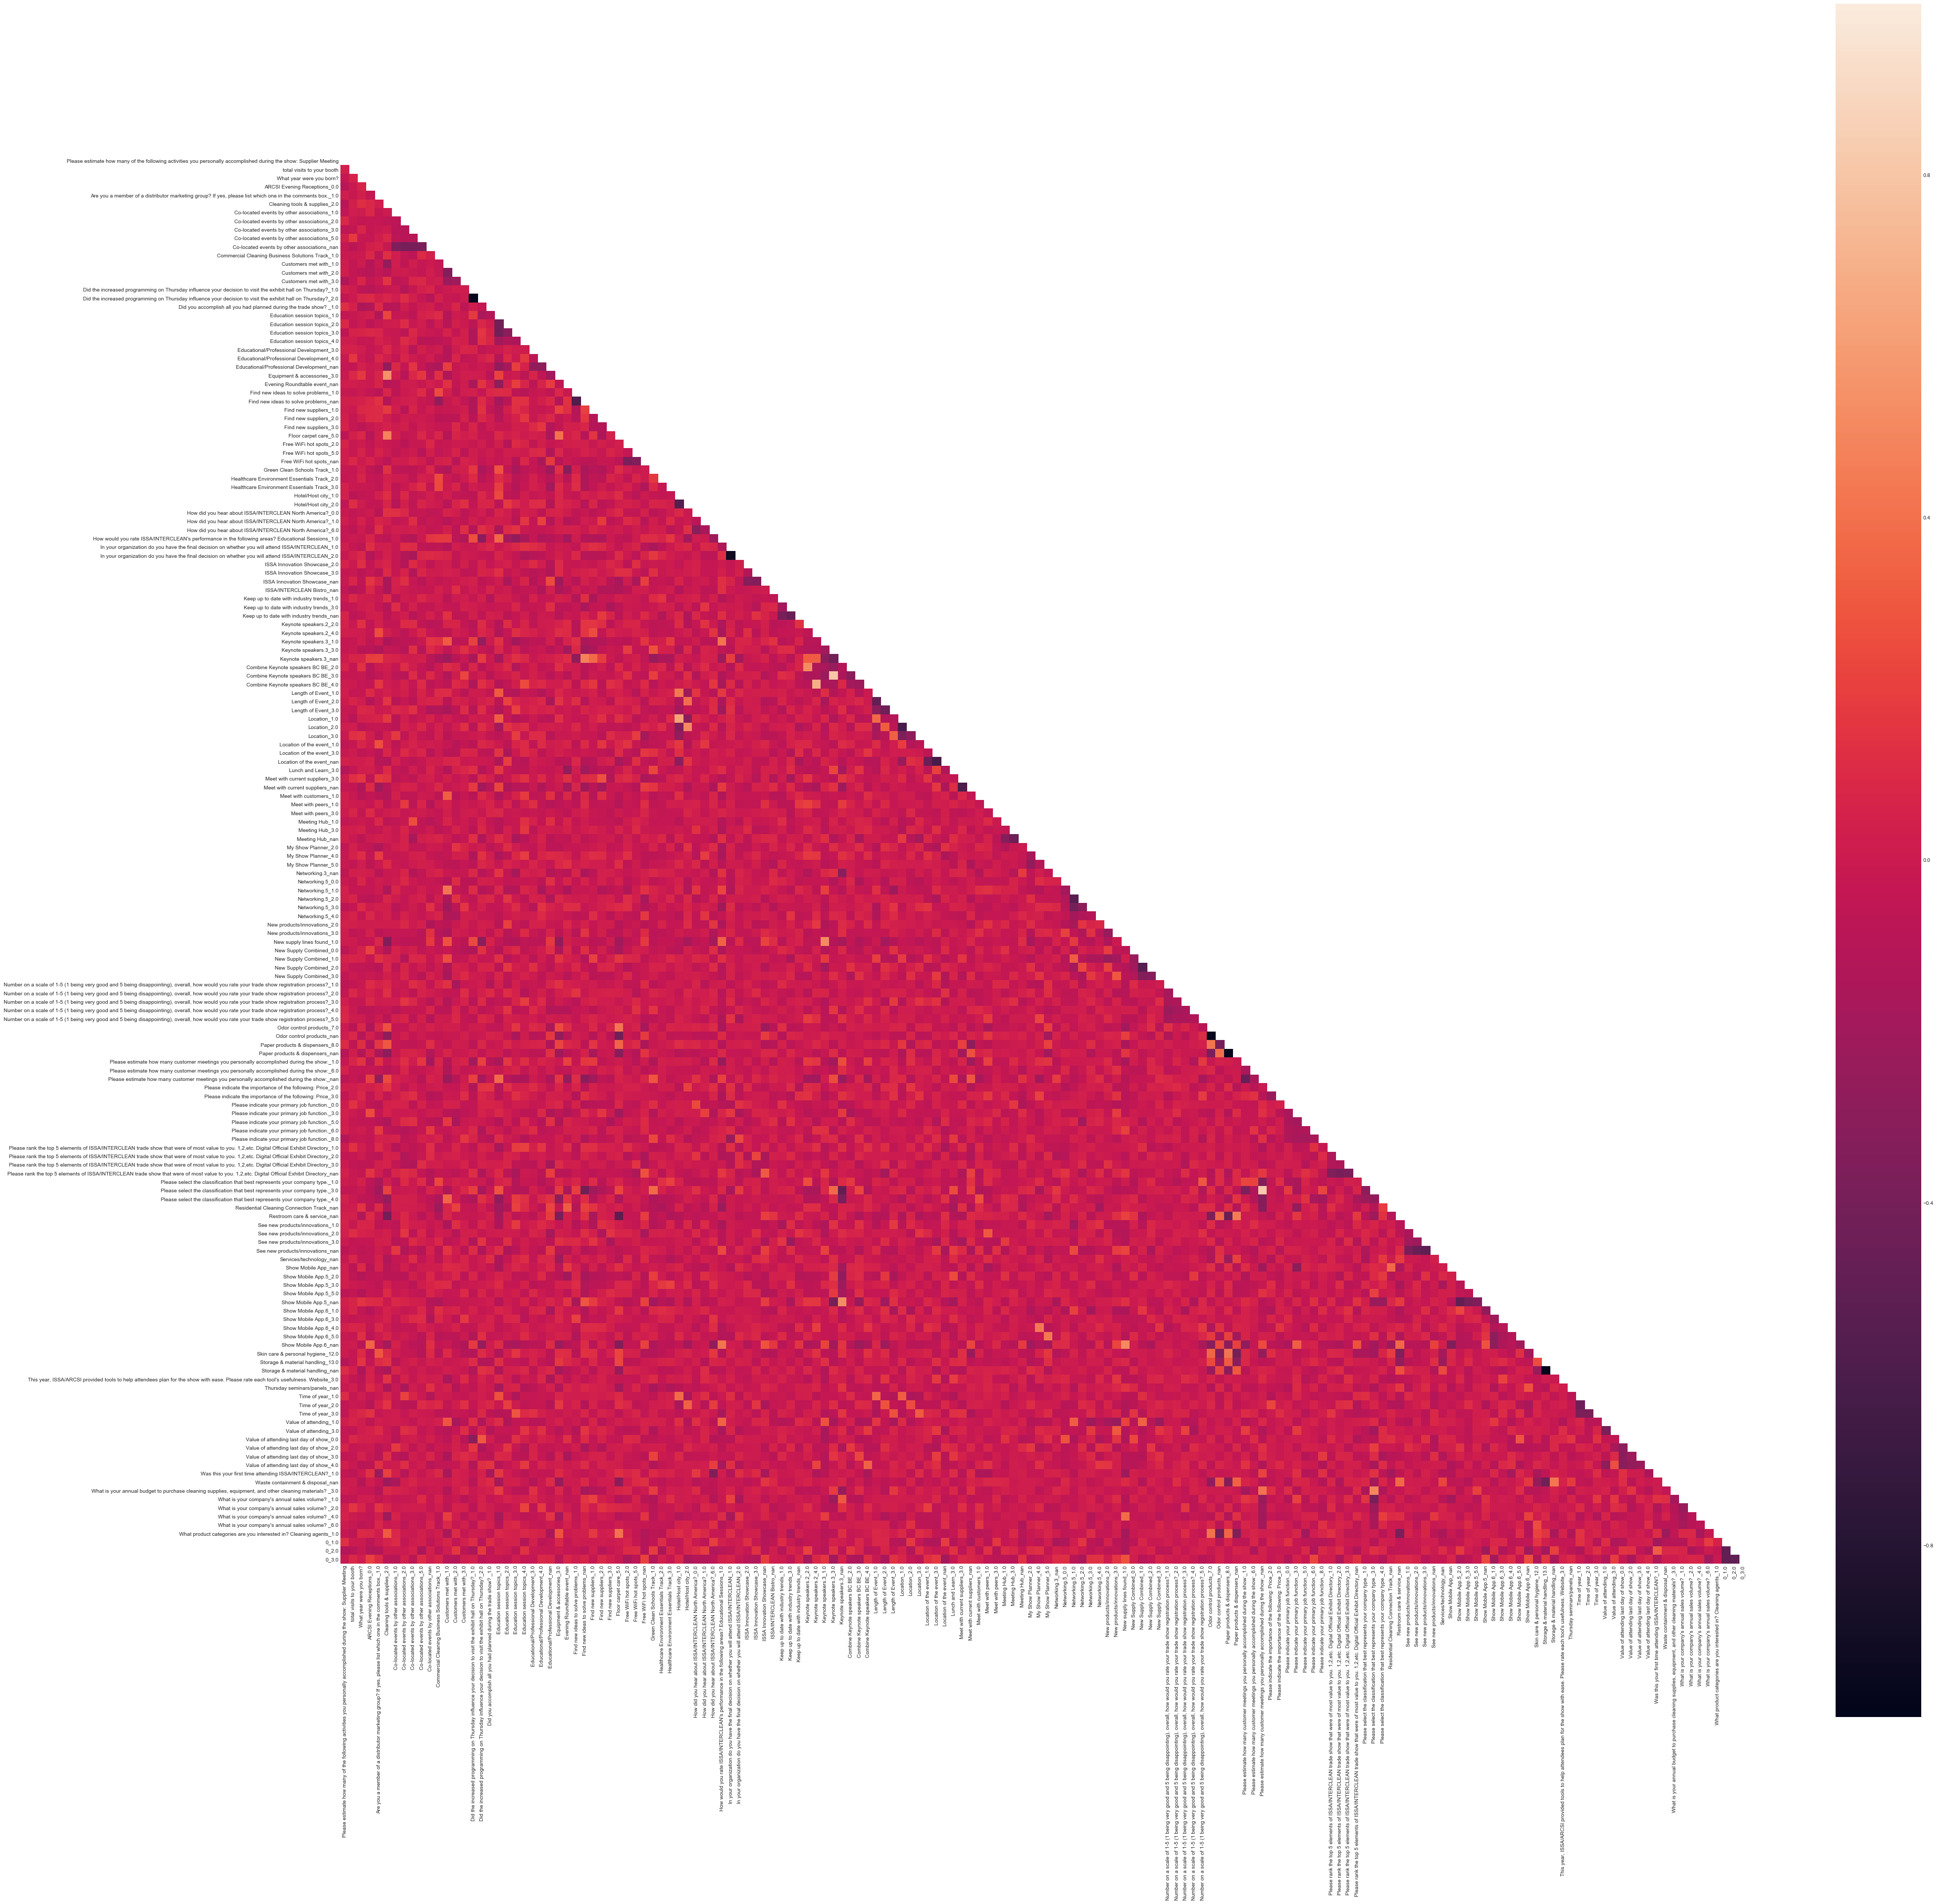

In [125]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
H.shape

In [392]:
H = H[H['sum_happy'] == 2]

In [279]:

corr = H.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

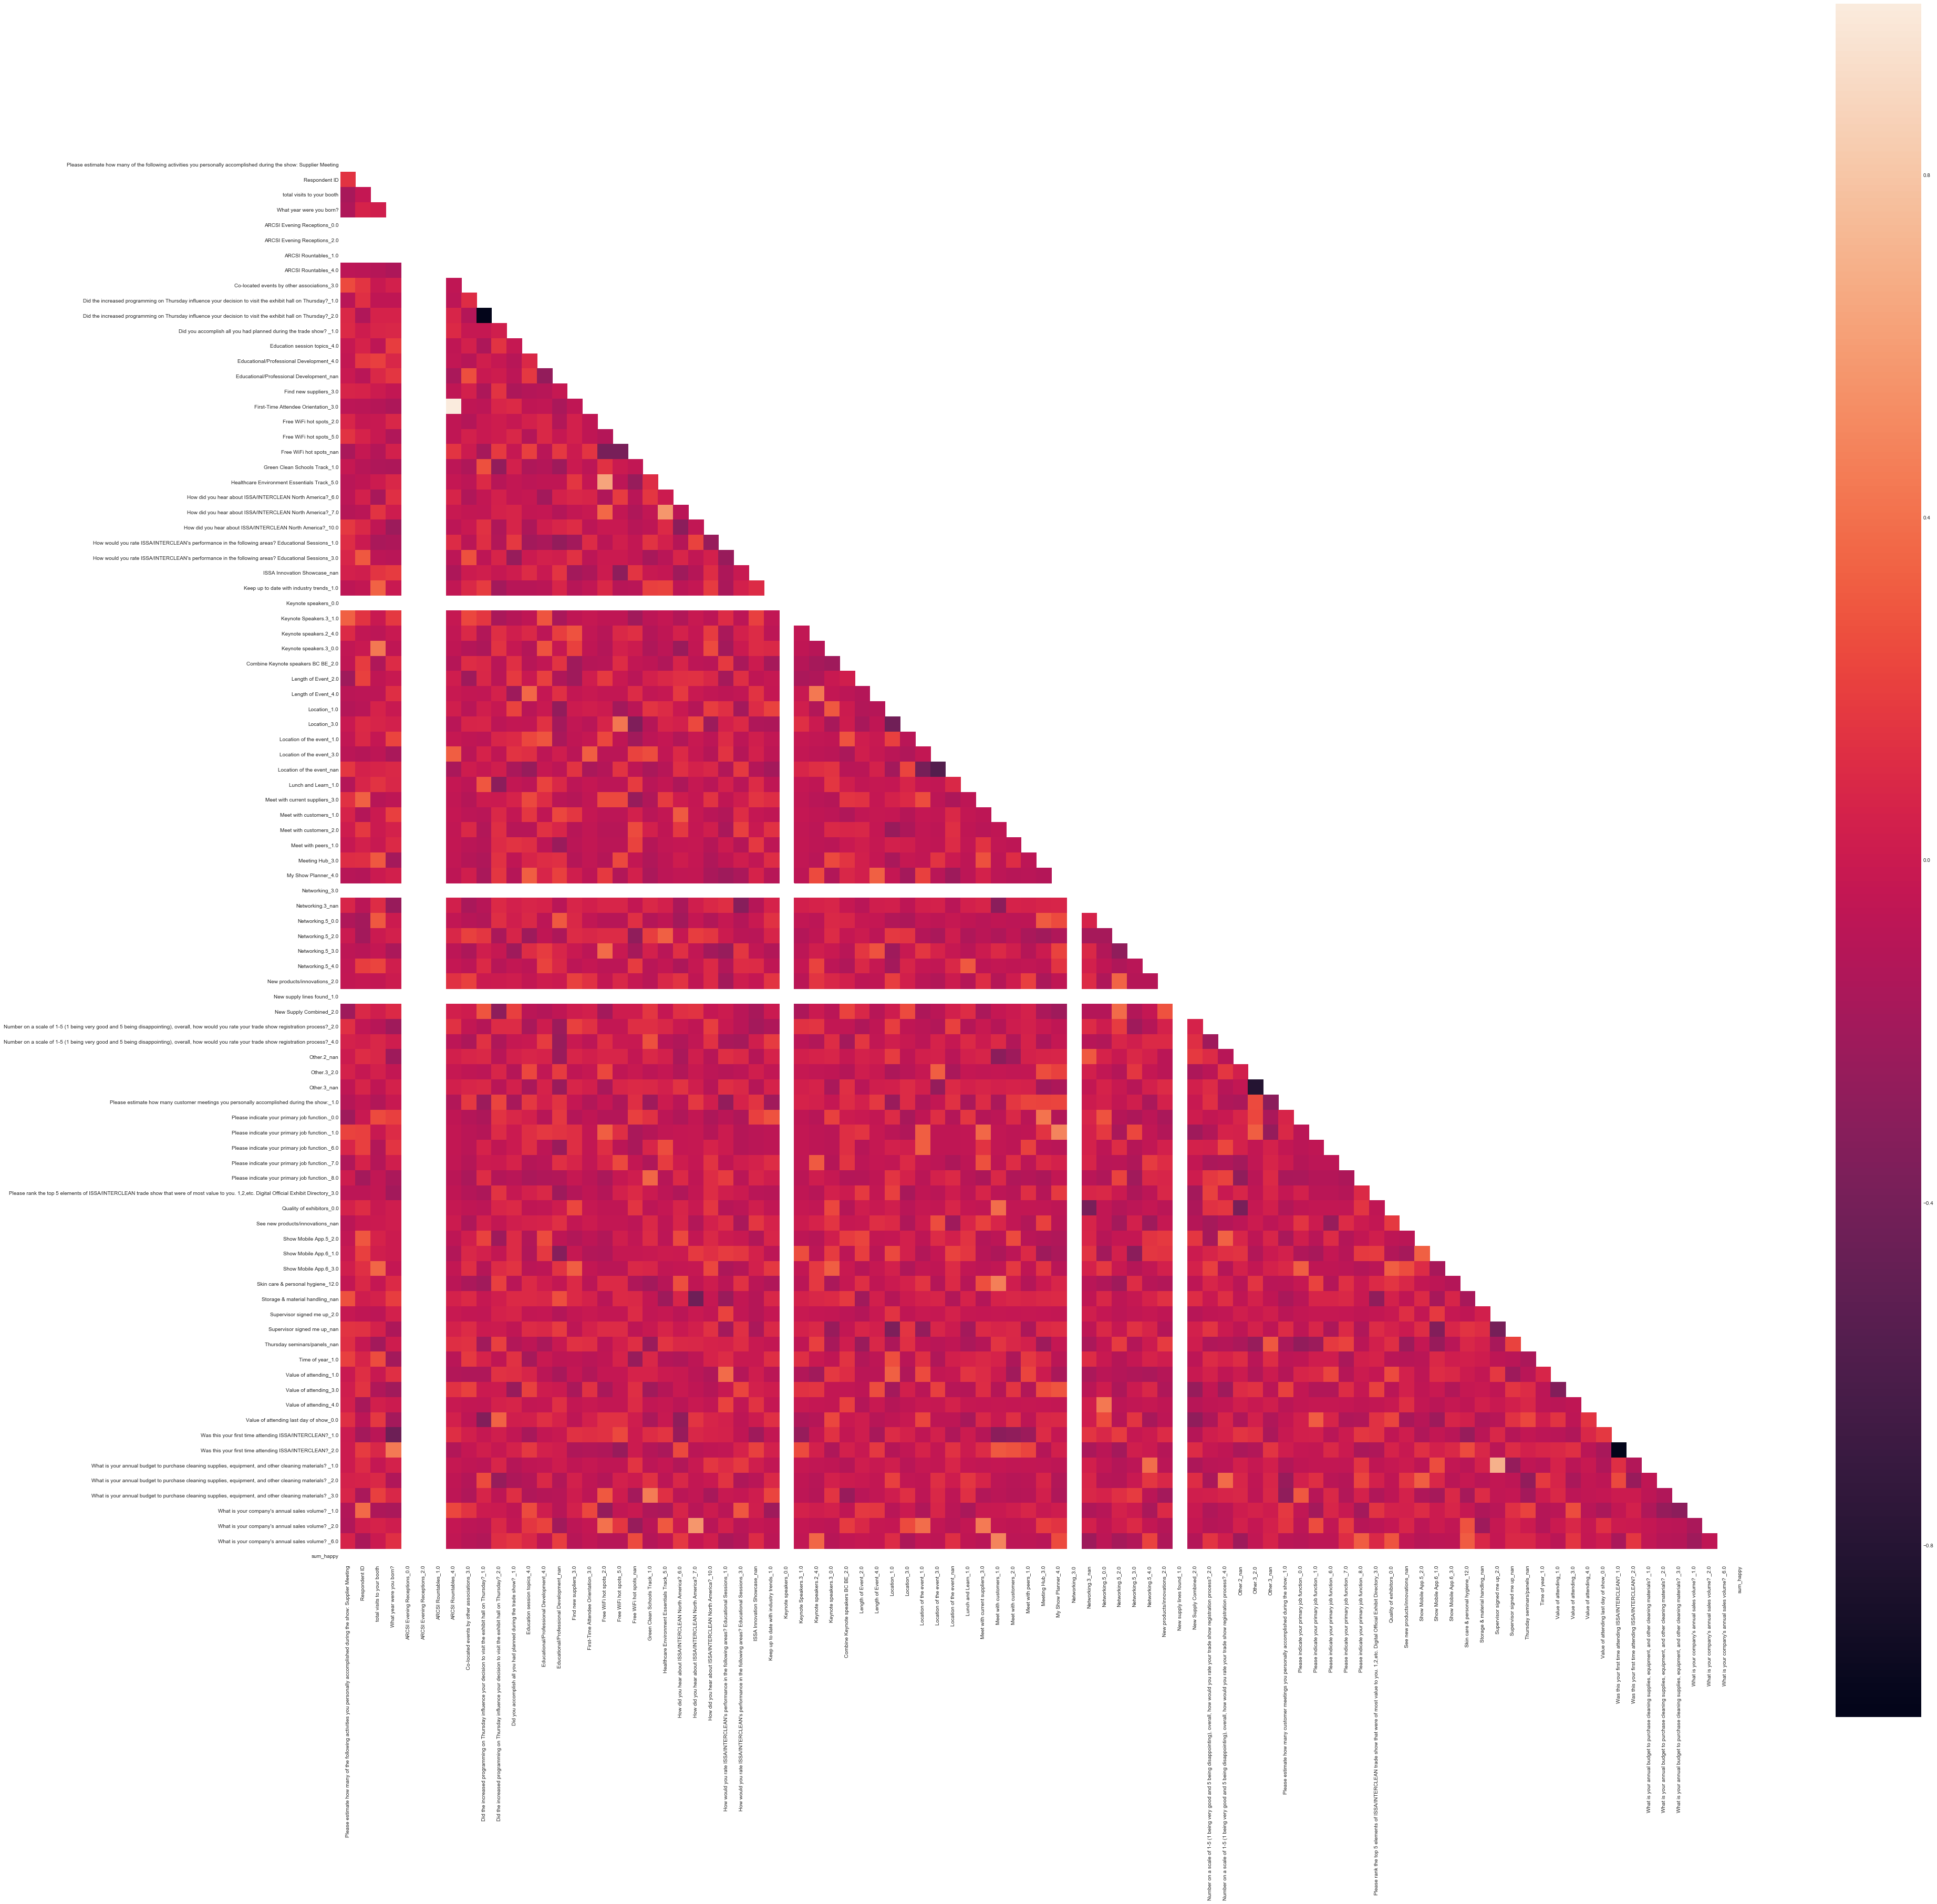

In [280]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [393]:
G=  G[G['sum_happy'] == 1]

In [ ]:
G.shape

In [282]:

corr = G.select_dtypes(include = ['int64', 'float64', 'uint8']).iloc[:, 1:].corr()

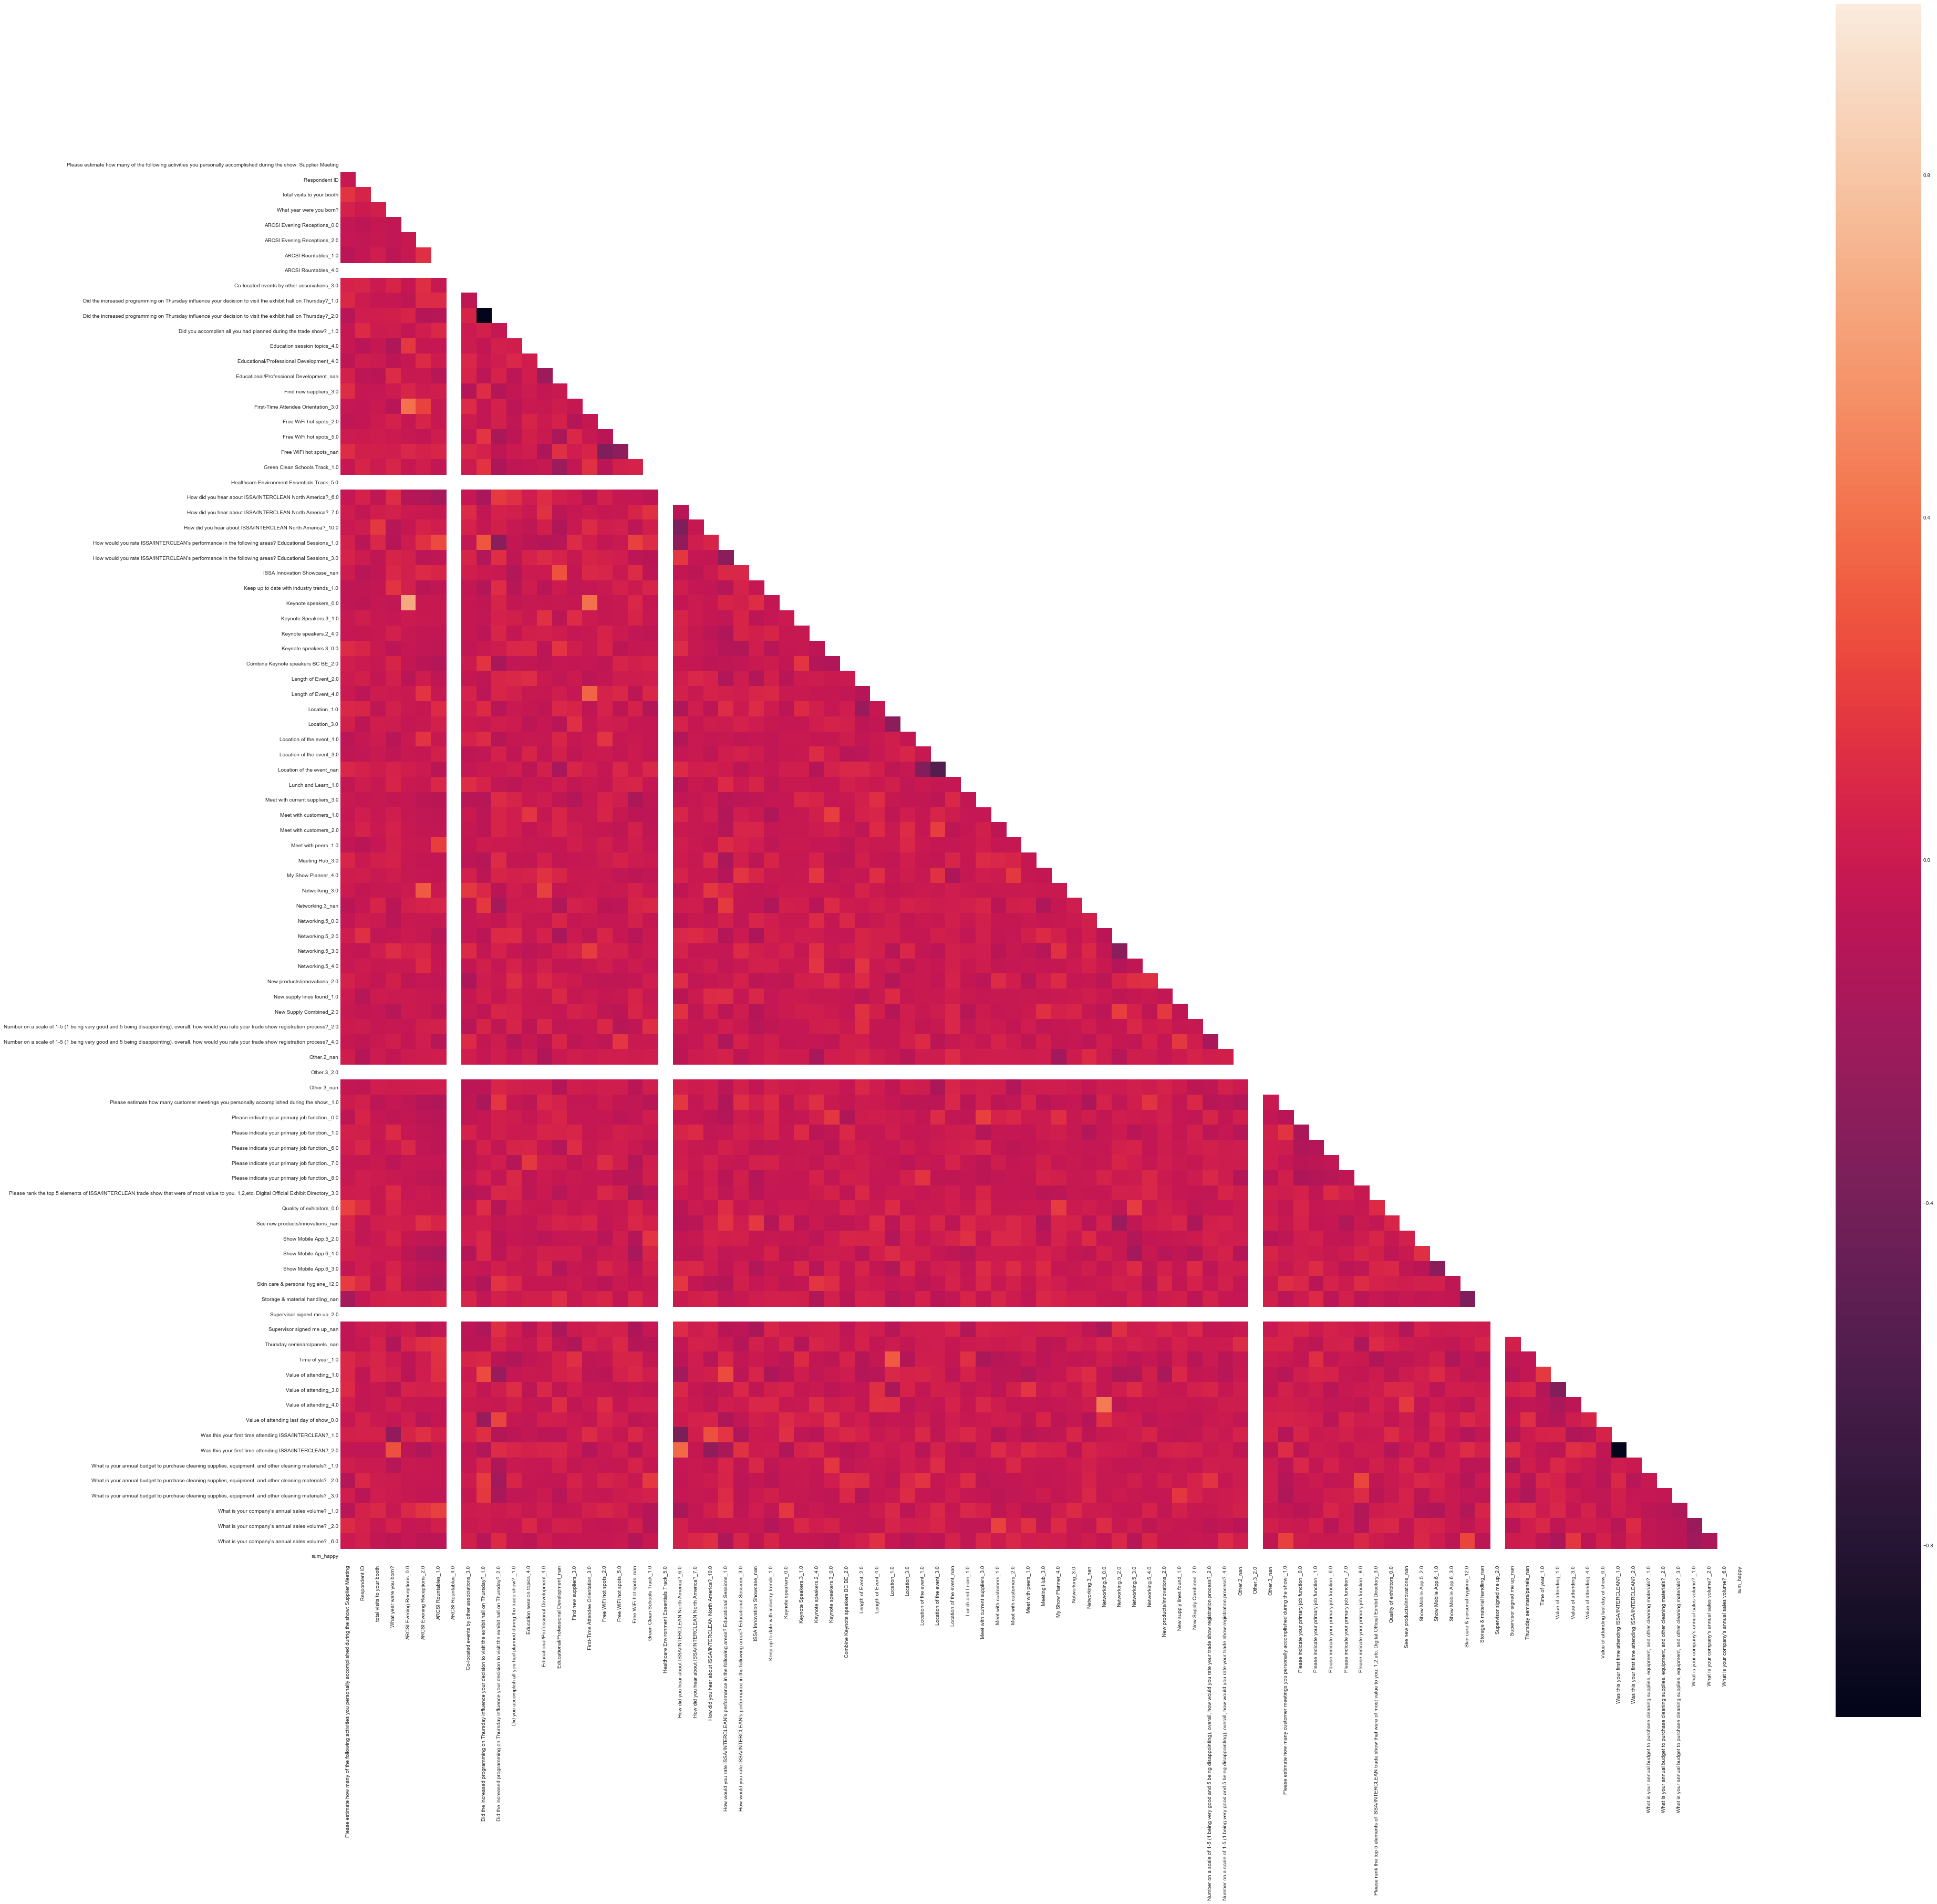

In [283]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [287]:
top_9_important_features = [] 
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] == 1:
        top_9_important_features.append(b)
        print b, X.columns[b]

5 ARCSI Evening Receptions_0.0
7 ARCSI Rountables_4.0
21 Healthcare Environment Essentials Track_5.0
28 Keynote speakers_0.0
37 Location of the event_1.0
49 Networking.5_0.0
54 New supply lines found_1.0
58 Other.2_nan
59 Other.3_2.0


In [288]:
new_X = X.iloc[:,top_9_important_features]
X = new_X

In [318]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))

#models.append(('SVC', SVC(kernel = 'linear', random_state = seed)))
#models.append(('LinearSVR', LinearSVR(random_state = seed)))
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring= scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.696078 (0.064587)
Ridge: 0.106565 (0.108745)
LDA: 0.725490 (0.057501)
NB: 0.664706 (0.177870)
CART: 0.719608 (0.054091)
KNeighborsClassifier: 0.696078 (0.041363)
XGBClassifier: 0.703922 (0.061037)
GradientBoostingClassifier: 0.719608 (0.054091)
AdaBoostClassifier: 0.721569 (0.056693)
RandomForestClassifier: 0.717647 (0.058298)
ExtraTreesClassifier: 0.719608 (0.054091)
DecisionTreeClassifier: 0.719608 (0.054091)


In [326]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num of feature: 3
Feature Ranking: [4 2 1 7 3 1 1 5 6]


In [362]:
model = LogisticRegression(random_state = seed)
fit = model.fit(X,y)
abs(fit.coef_[0])

array([ 1.09799335,  1.47985877,  1.26424825,  0.8219184 ,  1.31576855,
        1.71303438,  1.54614126,  0.80958656,  1.26424825])

In [291]:
Z=[]
Z=pd.concat([X,y],axis=1)

In [295]:
corr = Z.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

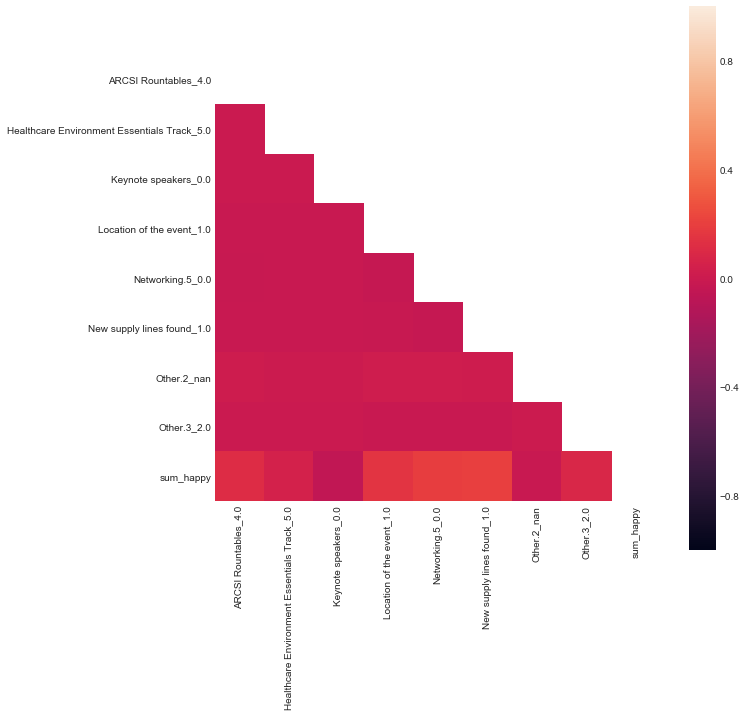

In [296]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [297]:
G = Z

In [298]:
H = Z

In [299]:
Z = Z[Z['sum_happy'] == 3]

In [300]:
corr = Z.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

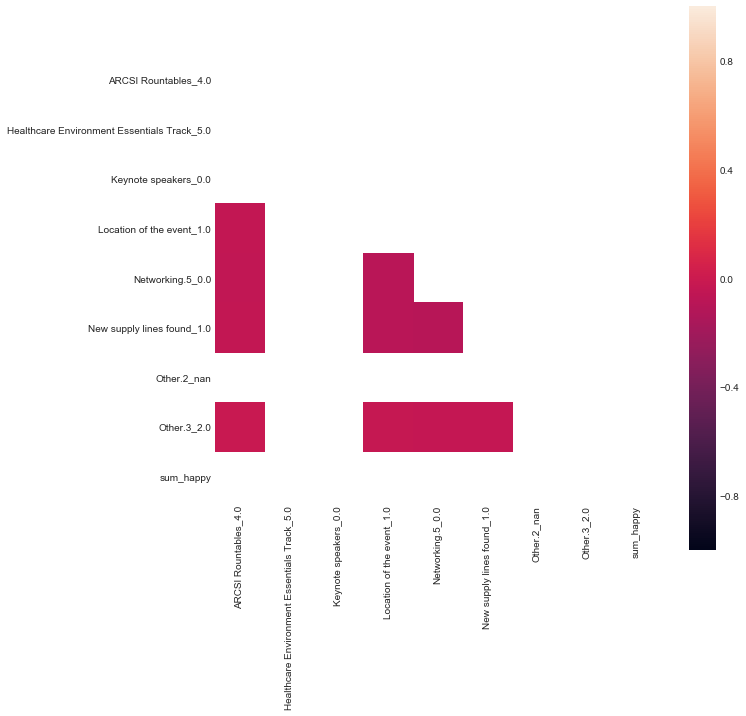

In [301]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [305]:
H = H[H['sum_happy'] == 2]

In [307]:
corr = H.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

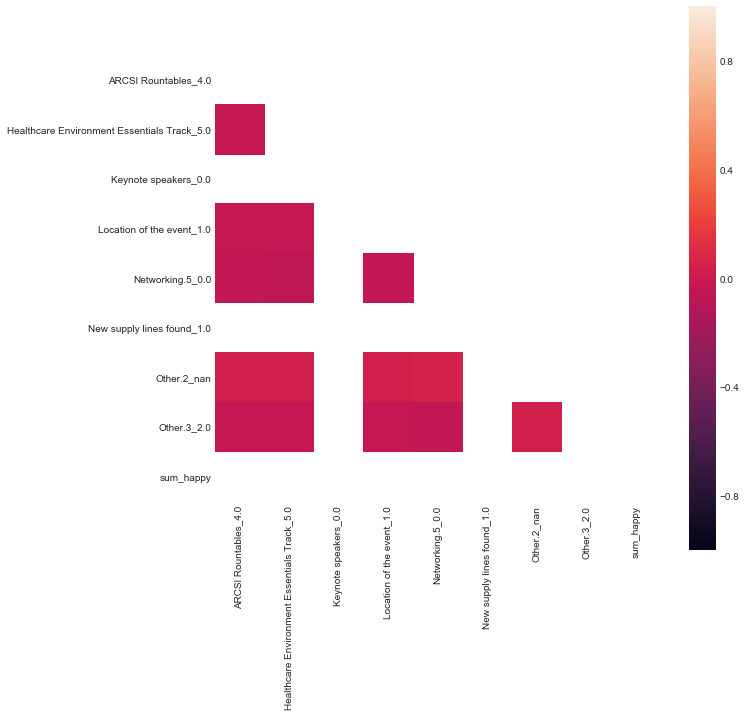

In [308]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [311]:
G = G[G['sum_happy'] == 1]

In [312]:
corr = G.select_dtypes(include = ['int64', 'float64','uint8']).iloc[:, 1:].corr()

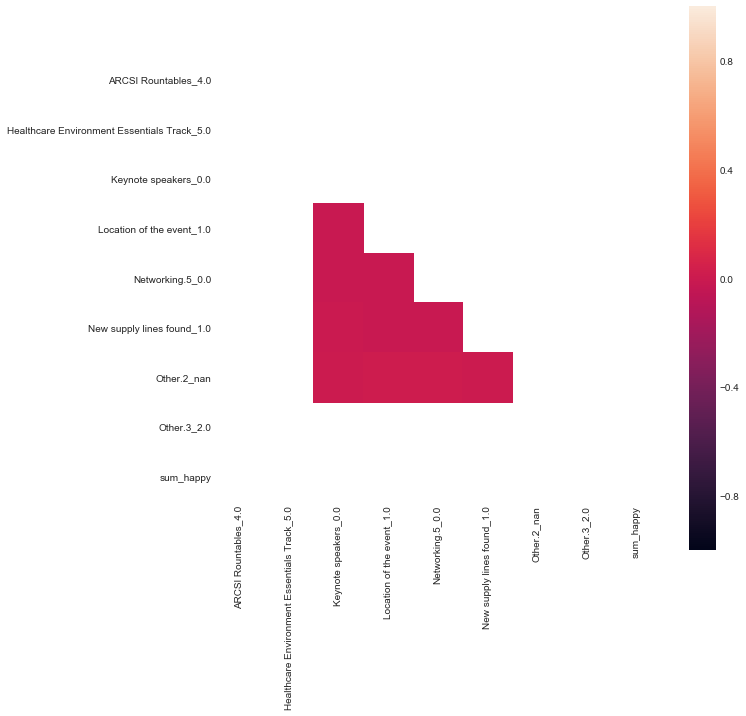

In [313]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
sum_pos = Z.loc[(Z['sum_happy']==3) | Z['sum_happy']==1]

In [ ]:
sum_pos

In [ ]:
corr = sum_pos.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
sum_neg = Z.loc[Z['sum_happy']==1]

In [ ]:
corr = sum_neg.select_dtypes(include = ['int64', 'float64']).iloc[:, 1:].corr()

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(60, 60))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1, vmax=1, square=True)

In [ ]:
estimator = xgb.XGBClassifier()
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = RandomForestClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


In [ ]:
estimator = LogisticRegression(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
estimator = AdaBoostClassifier(random_state = seed)
rfe = RFECV(estimator,cv = kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
fit.grid_scores_.sort()

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
model=[]
model = KNeighborsClassifier(n_neighbors = 3,)
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
msg = cv_results.mean(), cv_results.std()
print(msg)


In [ ]:
for b in range(0,len(fit.ranking_)):
    if fit.ranking_[b] ==1:
        print b, X.columns[b]

In [ ]:
estimator = GradientBoostingClassifier(random_state = seed)
rfe = RFECV(estimator, cv= kfold)
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
#print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
for a in range(1,11):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
butter = fit.grid_scores_.sort()


In [ ]:
fit.grid_scores_

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_)
plt.figure(figsize=(150,150))
plt.show()

In [ ]:
X.columns

In [ ]:
print('Feature  Accuracy')
for i in range(n_feats):
    X = iris.data[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X, y)
    print('%d        %g' % (i, scores.mean()))

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)

    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
rfe = RFE(model,1 )
fit = rfe.fit(X,y)
print("Num of feature: %d") % fit.n_features_
print("Selected features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
model = ExtraTreesClassifier(random_state = seed)
the_list = []
the_column = []
rfe = RFE(model,1)
fit = rfe.fit(X,y)
          
print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]
print("Optimal number of features : %d" % fit.n_features_)
print("Feature Ranking: %s") % fit.ranking_   

In [ ]:
print("Optimal number of features : %d" % rfe.n_features_)

In [ ]:
print( rfe.ranking_)

In [ ]:
print( rfe.ranking_)

In [ ]:
model = KNeighborsClassifier()
the_list = []
the_column = []
fit = rfe.fit(X,y)
rfe = RFE(model,1)
    #print("Selected features: %s") % fit.support_
for a in range(1,8):
    for b in range(0,len(fit.ranking_)):
        if fit.ranking_[b] == a:
            print a, b, X.columns[b]

In [ ]:
models=[]
models.append(('LR', LogisticRegression(random_state = seed)))
#models.append(('LASSO', Lasso())) 
#models.append(('Ridge', Ridge())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(random_state = seed))) 
models.append(('KNeighborsClassifier', KNeighborsClassifier())) 
#models.append(('XGBClassifier', xgb.XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state = seed)))
models.append(('AdaBoostClassifier', AdaBoostClassifier(random_state = seed)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state = seed)))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier(random_state = seed)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state = seed)))
#models.append(('SVC', SVC(kernel = 'linear', probability = True, random_state = seed)))

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)

In [ ]:

def test_ensemble(elist,single_score):
    
    for l in range(0, len(elist)):
        model1=elist[l]
        for j in range((l+1), len(elist)):
            model2=elist[j]
            for k in range((j+1), len(elist)):
                model3=elist[k]
                estimators=[]
                estimators.append(model1)
                estimators.append(model2)
                estimators.append(model3)
                #try:
                    
                ensemble = VotingClassifier(estimators, voting='soft')
                cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = None, cv=kfold) 
                if cv_results.mean() > single_score:
                    print estimators[0][0], estimators[1][0], estimators[2][0]
                    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
                    print msg
                
                 
                
                #except:
                    #msg = " BREAK with: " + estimators[0][0], estimators[1][0],estimators[2][0]
                    #print msg
                    
           

In [ ]:
test_ensemble(models, 0.65)

In [ ]:
LDA ExtraTreesClassifier SVC

In [ ]:
estimators=[]
model1 = LinearDiscriminantAnalysis()
estimators.append(('LDA', model1))
model2 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model2))
model3 = SVC(kernel = 'linear', probability = True, random_state = seed)
estimators.append(('SVC', model3))
ensemble = VotingClassifier(estimators, voting='soft')
ensemblefit = ensemble.fit(X,y)
rfe = RFE(ensemblefit,1)
fit = rfe.fit(X,y)
#kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
#cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
#msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print( fit.ranking_)


In [ ]:
estimators = []
model1 = ExtraTreesClassifier(random_state = seed)
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier(random_state = seed)
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
cv_results = model_selection.cross_val_score(ensemble, X, y, cv=kfold, scoring= scoring) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
estimators = []
model1 = ExtraTreesClassifier()
estimators.append(('ExtraTreesClassifier', model1))
model2 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model2))
model3 = GradientBoostingClassifier()
estimators.append(('GradientBoostingClassifier', model3))


ensemble = VotingClassifier(estimators, voting='soft')
cv_results = model_selection.cross_val_score(ensemble, X, y,scoring = scoring, cv=kfold) 
msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
print msg

In [ ]:
GradientBoostingClassifier(n_estimators= 32, learning_rate= 0.1, random_state= 7, max_depth= 3)

In [ ]:
param_grid = {'n_estimators': [10,20,30], 'learning_rate': [.1,.01,.001], 'random_state': [7], 'max_depth': [2,3,5,7]}
local_cv(GradientBoostingClassifier(), param_grid)

In [ ]:
def local_cv(model, params):                             #KFOLD WITH GRID SEARCH
    param_grid = params
    kfold = model_selection.KFold(shuffle = True, n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    for params, mean_score, scores in grid_result.grid_scores_:
        print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [ ]:
Finding and recommendations,  The question you want to predict for, ask first in your survey, for optimal data collection